# Modelos de aprednizado de máquinas voltados para tarefas de classificação

# 1. Importação e leitura dos dados

**Importação dos dados**

In [1]:
# Package
library(quantmod)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.


**Leitura dos dados**

In [2]:
getSymbols("^GSPC", from = '2000-01-01', to = '2021-05-31')   # dataset escolhido: US

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



[1] "^GSPC"

# 2. Inspeção do dataset

**Inspeção da frequência dos dados**

In [3]:
periodicity(GSPC)

Daily periodicity from 2000-01-03 to 2021-04-14 

**Inspeção das primeiras linhas**

In [4]:
head(GSPC)

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
2000-01-03   1469.25   1478.00  1438.36    1455.22   931800000       1455.22
2000-01-04   1455.22   1455.22  1397.43    1399.42  1009000000       1399.42
2000-01-05   1399.42   1413.27  1377.68    1402.11  1085500000       1402.11
2000-01-06   1402.11   1411.90  1392.10    1403.45  1092300000       1403.45
2000-01-07   1403.45   1441.47  1400.73    1441.47  1225200000       1441.47
2000-01-10   1441.47   1464.36  1441.47    1457.60  1064800000       1457.60

**Análise gráfica**

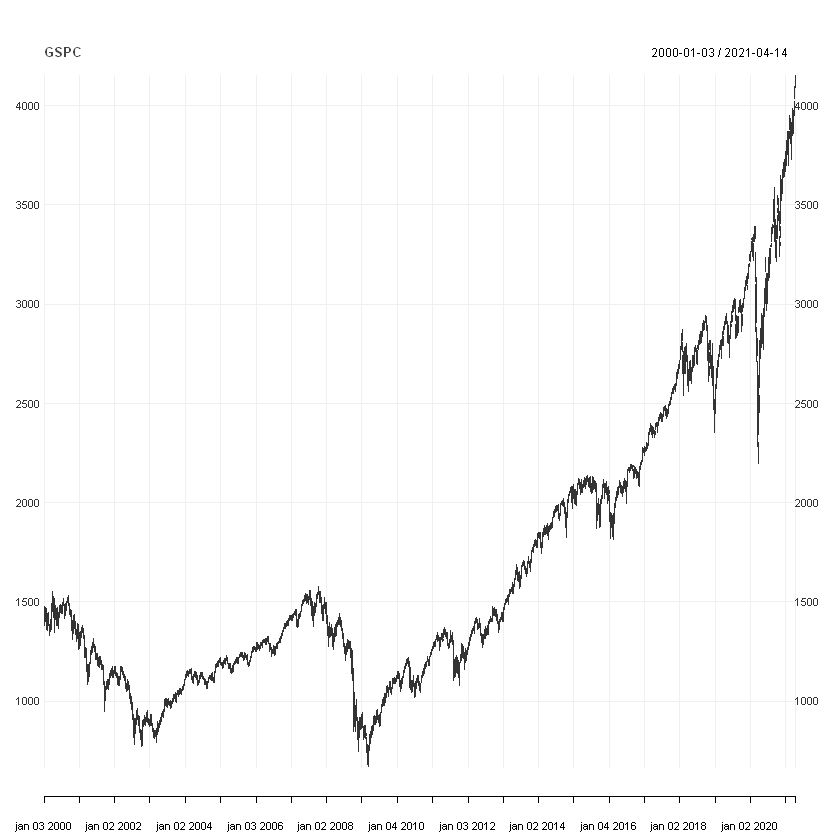

In [5]:
chart_Series(GSPC)

# 3. Construção das variáveis

In [6]:
# Package
library(TTR)

In [7]:
v.excluded <- c('GSPC.Open', 'GSPC.Volume', 'GSPC.Adjusted')

GSPC2 <- GSPC[, !(names(GSPC) %in% v.excluded)]

In [8]:
dim(GSPC2)

[1] 5354    3

## 3.1. Variáveis técnicas

In [9]:
# Log-Returns
GSPC.Return <- ts(round(log(GSPC2$GSPC.Close) - log(Lag(GSPC2$GSPC.Close, 1)), 2))

# Simple moving average (SMA)
GSPC.SMA <- ts(round(SMA(GSPC2$GSPC.Close, 10), 2))  # 10 days

# Weighted moving average (WMA)
GSPC.WMA <- ts(round(WMA(GSPC2$GSPC.Close, 10), 2))  # 10 days

# Standard deviation (STD)
GSPC.STD10 <- ts(round(rollapply(GSPC$GSPC.Close, 10, sd), 2))

# Momentum (mom)
GSPC.MOM <- ts(round(momentum(GSPC2$GSPC.Close, n = 1), 2))

# Rate Of Change (ROC)
GSPC.ROC <- ts(round(ROC(GSPC2$GSPC.Close), 2))

# Stochastic K% AND D%
GSPC.StochK <- ts(round(stoch(GSPC2)$fastK, 2))    # fastK
GSPC.StochD <- ts(round(stoch(GSPC2)$fastD, 2))    # fastD

# Relative Strength Index (RSI)
GSPC.RSI <- ts(round(RSI(GSPC2$GSPC.Close, n = 7, maType = "SMA"), 2))

# William's %R (WPR)
GSPC.WPR <- ts(round(WPR(GSPC2, n = 14), 2))

# The Average Direction Index (trend strength) (ADX) & The Direction Index (DX)
GSPC.ADX <- ts(round(ADX(GSPC2)$ADX, 2))
GSPC.DX <- ts(round(ADX(GSPC2)$DX, 2))

# Commodity Channel Index (CCI)
GSPC.CCI <- ts(round(CCI(GSPC2), 2))

# Chande Momentum Oscillator (CMO)
GSPC.CMO <- ts(round(CMO(GSPC$GSPC.Close), 2))

# Triple Smoothed Exponential Oscillator (TRIX)
GSPC.TRIX <- ts(round(TRIX(GSPC$GSPC.Close)$TRIX, 2))

# Moving Average Convergence Divergence (MACD)
GSPC.MACD <- ts(round(MACD(GSPC2$GSPC.Close, 12, 26, 9, maType = "EMA")$macd, 2))
GSPC.Signal <- ts(round(MACD(GSPC2$GSPC.Close, 12, 26, 9, maType = "EMA")$signal, 2))
GSPC.Histogram <- ts(round(GSPC.MACD - GSPC.Signal, 2))

# Bollinger Bands (BBANDS)
GSPC.bbup <- BBands(GSPC2, n = 20, sd = 2)$up
GSPC.bbdn <- BBands(GSPC2, n = 20, sd = 2)$dn
GSPC.BBANDS <- ts(round(GSPC.bbup - GSPC.bbdn, 2))

In [10]:
v.technical <- cbind(GSPC.Return, GSPC.SMA, GSPC.WMA, GSPC.STD10, GSPC.MOM, GSPC.ROC, GSPC.StochK, GSPC.StochD, GSPC.RSI,
                     GSPC.WPR, GSPC.ADX, GSPC.DX, GSPC.CCI, GSPC.CMO, GSPC.TRIX, GSPC.MACD, GSPC.Signal, GSPC.Histogram,
                     GSPC.BBANDS)

In [11]:
dim(v.technical)

[1] 5354   19

In [12]:
GSPC.df <- as.data.frame(cbind(GSPC2, v.technical))
head(GSPC.df)

GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
1478.00,1438.36,1455.22,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1455.22,1397.43,1399.42,-0.04,NA,NA,NA,-55.80,-0.04,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1413.27,1377.68,1402.11,0.00,NA,NA,NA,2.69,0.00,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1411.90,1392.10,1403.45,0.00,NA,NA,NA,1.34,0.00,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1441.47,1400.73,1441.47,0.03,NA,NA,NA,38.02,0.03,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1464.36,1441.47,1457.60,0.01,NA,NA,NA,16.13,0.01,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [13]:
tail(GSPC.df)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
5349,4083.13,4068.31,4079.95,0.00,3992.74,4024.97,68.48,6.01,0.00,0.97,...,0.03,14.71,28.62,188.90,28.55,0.10,1.17,0.83,0.34,216.26
5350,4098.19,4082.54,4097.17,0.00,4013.54,4043.96,65.03,17.22,0.00,1.00,...,0.00,15.95,32.02,171.60,55.19,0.10,1.28,0.92,0.36,236.34
5351,4129.48,4095.51,4128.80,0.01,4035.47,4064.92,62.99,31.63,0.01,1.00,...,0.00,17.56,38.55,164.62,60.16,0.11,1.40,1.01,0.39,265.99
5352,4131.76,4114.82,4127.99,0.00,4050.82,4081.74,65.15,-0.81,0.00,0.99,...,0.01,19.10,39.01,141.75,56.47,0.12,1.48,1.11,0.37,290.15
5353,4148.00,4124.43,4141.59,0.00,4067.87,4098.24,64.27,13.60,0.00,0.98,...,0.02,20.75,42.33,130.61,73.27,0.13,1.56,1.20,0.36,315.02
5354,4151.69,4120.87,4124.66,0.00,4084.48,4108.57,53.43,-16.93,0.00,0.91,...,0.09,22.35,43.08,108.58,75.75,0.14,1.56,1.27,0.29,333.67


## 3.2. Variáveis de direção

In [14]:
# Direção numérica
GSPC.Direction <- NULL
GSPC.Direction[GSPC2$GSPC.Close >= lag(GSPC2$GSPC.Close, -20)] <- 0           # P(t) >= P(t+20)
GSPC.Direction[GSPC2$GSPC.Close < lag(GSPC2$GSPC.Close, -20)] <- 1            # P(t) < P(t+20)

In [15]:
# Direção não numérica
GSPC.Trend <- NULL
GSPC.Trend[GSPC2$GSPC.Close > lag(GSPC2$GSPC.Close, -20)] <- "down"           # P(t) > P(t+20)
GSPC.Trend[GSPC2$GSPC.Close < lag(GSPC2$GSPC.Close, -20)] <- "up"             # P(t) < P(t+20)
GSPC.Trend[GSPC2$GSPC.Close == lag(GSPC2$GSPC.Close, -20)] <- "nowhere"       # P(t) = P(t+20)

In [16]:
head(cbind(GSPC.Direction, GSPC.Trend))

GSPC.Direction,GSPC.Trend
0,down
1,up
1,up
1,up
0,down
0,down


In [17]:
tail(cbind(GSPC.Direction, GSPC.Trend))

,GSPC.Direction,GSPC.Trend
"[5349,]",NA,NA
"[5350,]",NA,NA
"[5351,]",NA,NA
"[5352,]",NA,NA
"[5353,]",NA,NA
"[5354,]",NA,NA


In [18]:
# Agregando as séries de direção ao dataset
GSPC.df1 <- as.data.frame(cbind(GSPC.df, GSPC.Direction, GSPC.Trend))
tail(GSPC.df1)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS,GSPC.Direction,GSPC.Trend
5349,4083.13,4068.31,4079.95,0.00,3992.74,4024.97,68.48,6.01,0.00,0.97,...,28.62,188.90,28.55,0.10,1.17,0.83,0.34,216.26,NA,NA
5350,4098.19,4082.54,4097.17,0.00,4013.54,4043.96,65.03,17.22,0.00,1.00,...,32.02,171.60,55.19,0.10,1.28,0.92,0.36,236.34,NA,NA
5351,4129.48,4095.51,4128.80,0.01,4035.47,4064.92,62.99,31.63,0.01,1.00,...,38.55,164.62,60.16,0.11,1.40,1.01,0.39,265.99,NA,NA
5352,4131.76,4114.82,4127.99,0.00,4050.82,4081.74,65.15,-0.81,0.00,0.99,...,39.01,141.75,56.47,0.12,1.48,1.11,0.37,290.15,NA,NA
5353,4148.00,4124.43,4141.59,0.00,4067.87,4098.24,64.27,13.60,0.00,0.98,...,42.33,130.61,73.27,0.13,1.56,1.20,0.36,315.02,NA,NA
5354,4151.69,4120.87,4124.66,0.00,4084.48,4108.57,53.43,-16.93,0.00,0.91,...,43.08,108.58,75.75,0.14,1.56,1.27,0.29,333.67,NA,NA


**Inspeção da estrutura do dataset**

In [19]:
str(GSPC.df1)

'data.frame':	5354 obs. of  24 variables:
 $ GSPC.High     : num  1478 1455 1413 1412 1441 ...
 $ GSPC.Low      : num  1438 1397 1378 1392 1401 ...
 $ GSPC.Close    : num  1455 1399 1402 1403 1441 ...
 $ GSPC.Return   : num  NA -0.04 0 0 0.03 0.01 -0.01 0 0.01 0.01 ...
 $ GSPC.SMA      : num  NA NA NA NA NA ...
 $ GSPC.WMA      : num  NA NA NA NA NA ...
 $ GSPC.STD10    : num  NA NA NA NA NA NA NA NA NA 24.6 ...
 $ GSPC.MOM      : num  NA -55.8 2.69 1.34 38.02 ...
 $ GSPC.ROC      : num  NA -0.04 0 0 0.03 0.01 -0.01 0 0.01 0.01 ...
 $ GSPC.StochK   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.StochD   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.RSI      : num  NA NA NA NA NA ...
 $ GSPC.WPR      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.ADX      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.DX       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.CCI      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.CMO      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.TRIX 

# 4. Análise exploratória dos dados

## 4.1. Dados ausentes

**Identificação dos dados ausentes**

In [20]:
round(prop.table(table(is.na(GSPC.df1)))*100, digits = 2)[2]

# Mesmo com os NA's nas primeiras linhas e nas últimas linhas, o % de NA's total é inferior a 1%

TRUE 
0.28

**Remoção dos dados ausentes**

In [21]:
GSPC.df2 <- na.omit(GSPC.df1)
round(prop.table(table(is.na(GSPC.df2)))*100, digits = 2)[2]

<NA> 
  NA

**Inspeção da estrutura dos dados**

In [22]:
str(GSPC.df2)

'data.frame':	5276 obs. of  24 variables:
 $ GSPC.High     : num  1535 1527 1521 1517 1520 ...
 $ GSPC.Low      : num  1518 1507 1497 1475 1484 ...
 $ GSPC.Close    : num  1524 1508 1509 1488 1499 ...
 $ GSPC.Return   : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.SMA      : num  1470 1485 1497 1500 1503 ...
 $ GSPC.WMA      : num  1497 1504 1508 1506 1506 ...
 $ GSPC.STD10    : num  57.4 42.8 27.9 24.8 21.5 ...
 $ GSPC.MOM      : num  -3.6 -16.13 0.79 -20.6 10.66 ...
 $ GSPC.ROC      : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.StochK   : num  0.86 0.77 0.77 0.67 0.72 0.76 0.64 0.52 0.62 0.73 ...
 $ GSPC.StochD   : num  0.9 0.84 0.8 0.74 0.72 0.72 0.71 0.64 0.59 0.62 ...
 $ GSPC.RSI      : num  87 72 78.4 46 48.7 ...
 $ GSPC.WPR      : num  0.14 0.23 0.23 0.33 0.28 0.24 0.36 0.48 0.38 0.27 ...
 $ GSPC.ADX      : num  26.4 27.3 27.7 27 26.5 ...
 $ GSPC.DX       : num  47 39.2 32.7 18.7 19.7 ...
 $ GSPC.CCI      : num  130.5 101.7 85.4 59.7 62.6 ...
 $ GSPC.C

Como as análises exploratória e o preprocessamento de dados focam nas features, a partir deste momento trabalharemos com o dataframe sem as variáveis de direção.

In [23]:
v.direction <- c('GSPC.Direction', 'GSPC.Trend')
GSPC.df3 <- GSPC.df2[, !(names(GSPC.df2) %in% v.direction)]

In [24]:
str(GSPC.df3)

'data.frame':	5276 obs. of  22 variables:
 $ GSPC.High     : num  1535 1527 1521 1517 1520 ...
 $ GSPC.Low      : num  1518 1507 1497 1475 1484 ...
 $ GSPC.Close    : num  1524 1508 1509 1488 1499 ...
 $ GSPC.Return   : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.SMA      : num  1470 1485 1497 1500 1503 ...
 $ GSPC.WMA      : num  1497 1504 1508 1506 1506 ...
 $ GSPC.STD10    : num  57.4 42.8 27.9 24.8 21.5 ...
 $ GSPC.MOM      : num  -3.6 -16.13 0.79 -20.6 10.66 ...
 $ GSPC.ROC      : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.StochK   : num  0.86 0.77 0.77 0.67 0.72 0.76 0.64 0.52 0.62 0.73 ...
 $ GSPC.StochD   : num  0.9 0.84 0.8 0.74 0.72 0.72 0.71 0.64 0.59 0.62 ...
 $ GSPC.RSI      : num  87 72 78.4 46 48.7 ...
 $ GSPC.WPR      : num  0.14 0.23 0.23 0.33 0.28 0.24 0.36 0.48 0.38 0.27 ...
 $ GSPC.ADX      : num  26.4 27.3 27.7 27 26.5 ...
 $ GSPC.DX       : num  47 39.2 32.7 18.7 19.7 ...
 $ GSPC.CCI      : num  130.5 101.7 85.4 59.7 62.6 ...
 $ GSPC.C

## 4.2. Estatística descritiva

In [25]:
summary(GSPC.df3)

   GSPC.High         GSPC.Low        GSPC.Close      GSPC.Return        
 Min.   : 695.3   Min.   : 666.8   Min.   : 676.5   Min.   :-0.1300000  
 1st Qu.:1172.6   1st Qu.:1154.3   1st Qu.:1162.9   1st Qu.: 0.0000000  
 Median :1399.1   Median :1378.2   Median :1389.4   Median : 0.0000000  
 Mean   :1686.7   Mean   :1666.4   Mean   :1677.1   Mean   : 0.0001478  
 3rd Qu.:2093.8   3rd Qu.:2075.7   3rd Qu.:2084.2   3rd Qu.: 0.0100000  
 Max.   :3981.0   Max.   :3953.4   Max.   :3968.9   Max.   : 0.1100000  
    GSPC.SMA         GSPC.WMA        GSPC.STD10         GSPC.MOM        
 Min.   : 707.9   Min.   : 700.9   Min.   :  2.760   Min.   :-324.8900  
 1st Qu.:1162.1   1st Qu.:1161.3   1st Qu.:  9.918   1st Qu.:  -7.1900  
 Median :1390.3   Median :1390.7   Median : 14.870   Median :   0.9600  
 Mean   :1675.1   Mean   :1675.7   Mean   : 19.496   Mean   :   0.4616  
 3rd Qu.:2081.6   3rd Qu.:2082.3   3rd Qu.: 23.110   3rd Qu.:   8.9400  
 Max.   :3915.9   Max.   :3920.2   Max.   :245.110 

É possível analisar a frequência de cada direção não numérica

In [26]:
summary(GSPC.df2$GSPC.Trend)

down   up 
1962 3314

## 4.3. Identificação de outliers

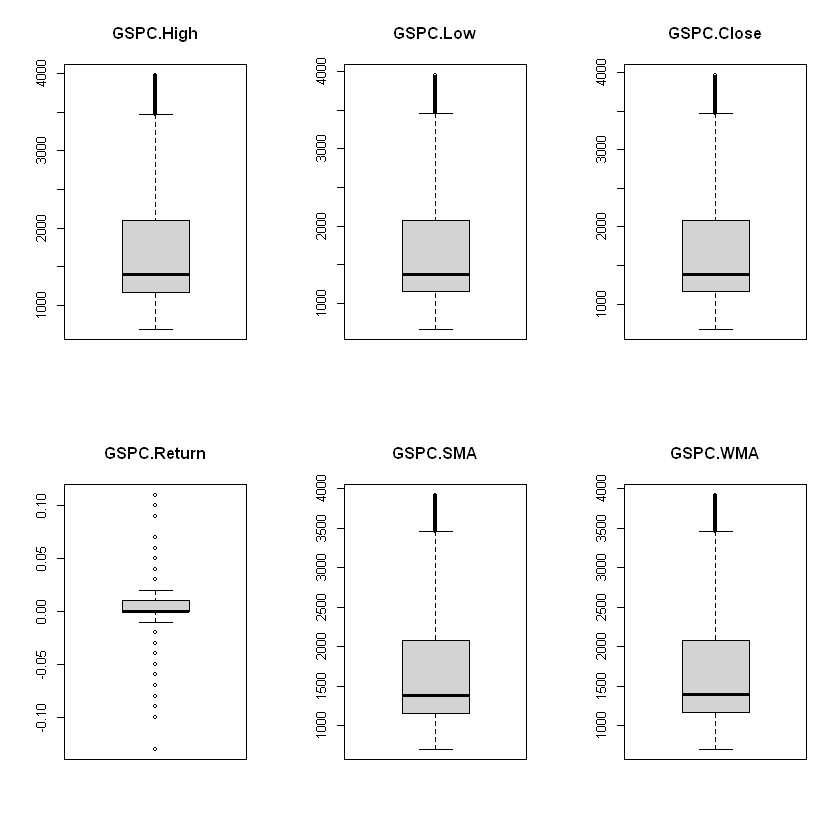

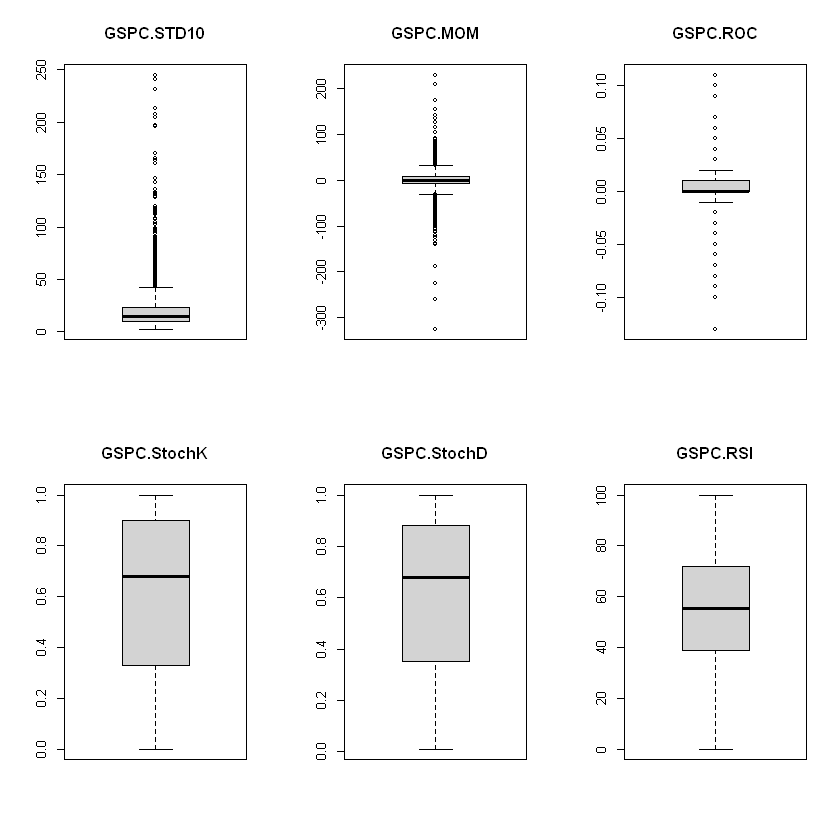

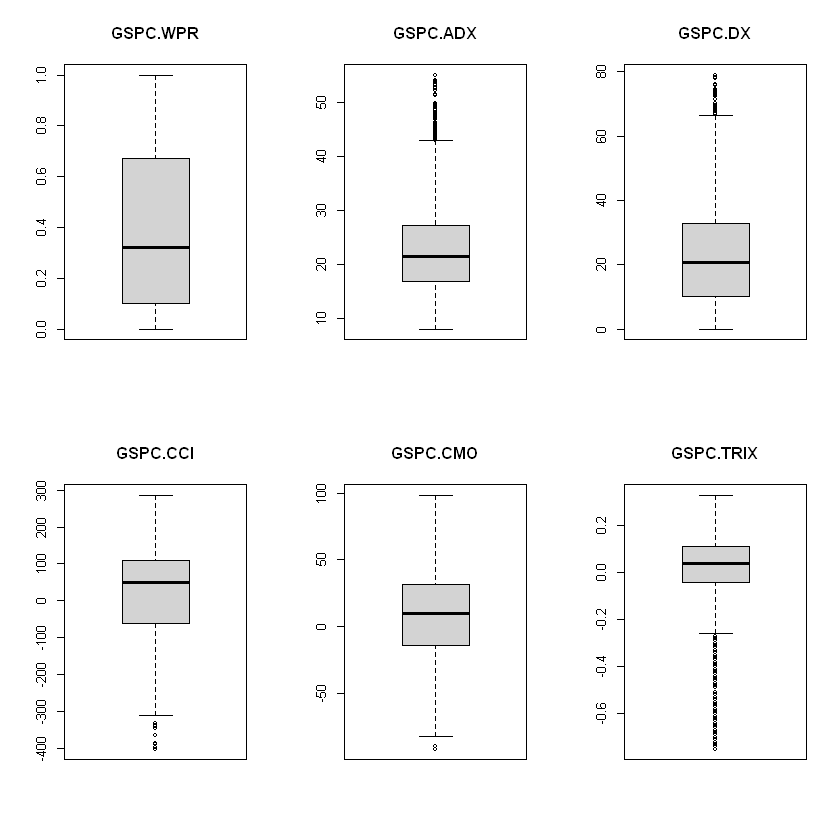

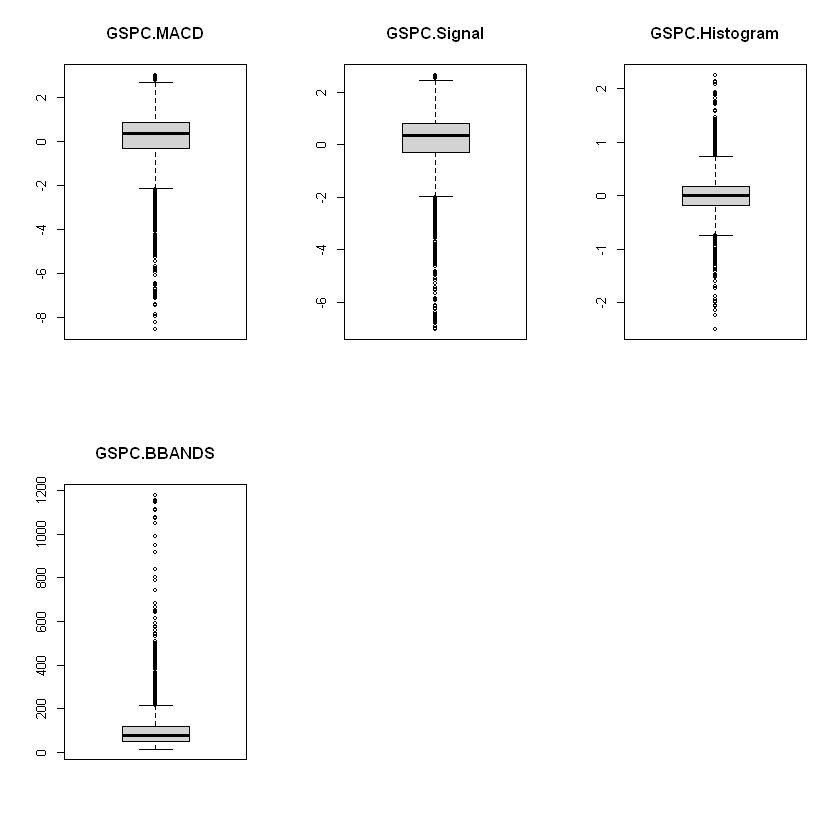

In [27]:
par(mfrow=c(2, 3))

for (column in colnames(GSPC.df3)){
    boxplot(GSPC.df3[,column], col = 'light grey', main = column, border = 'black', horizontal = FALSE)
}

## 4.4. Histogramas

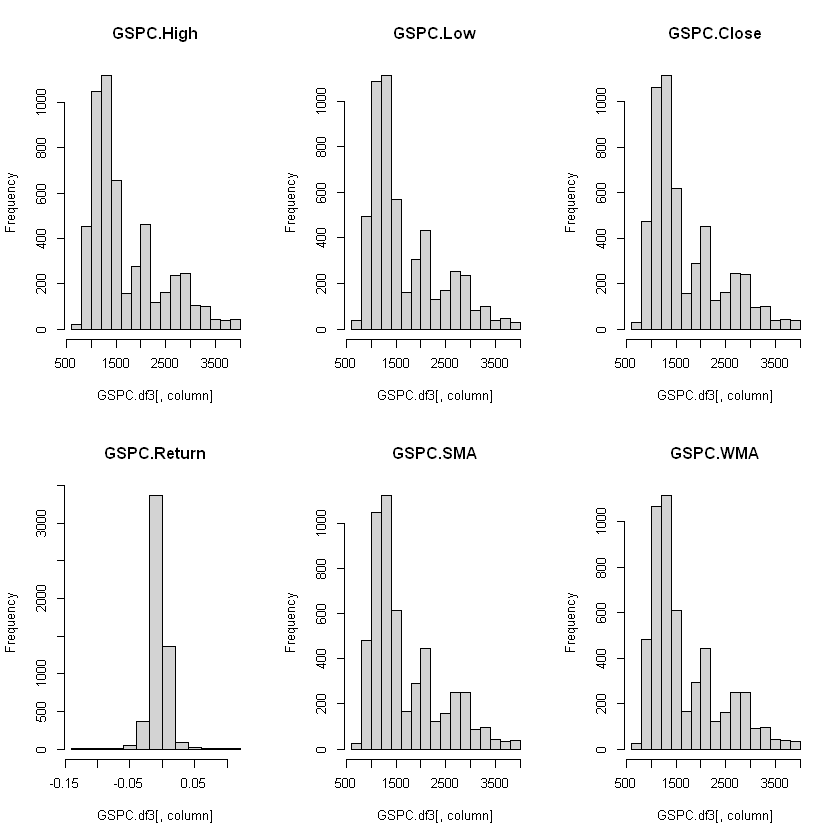

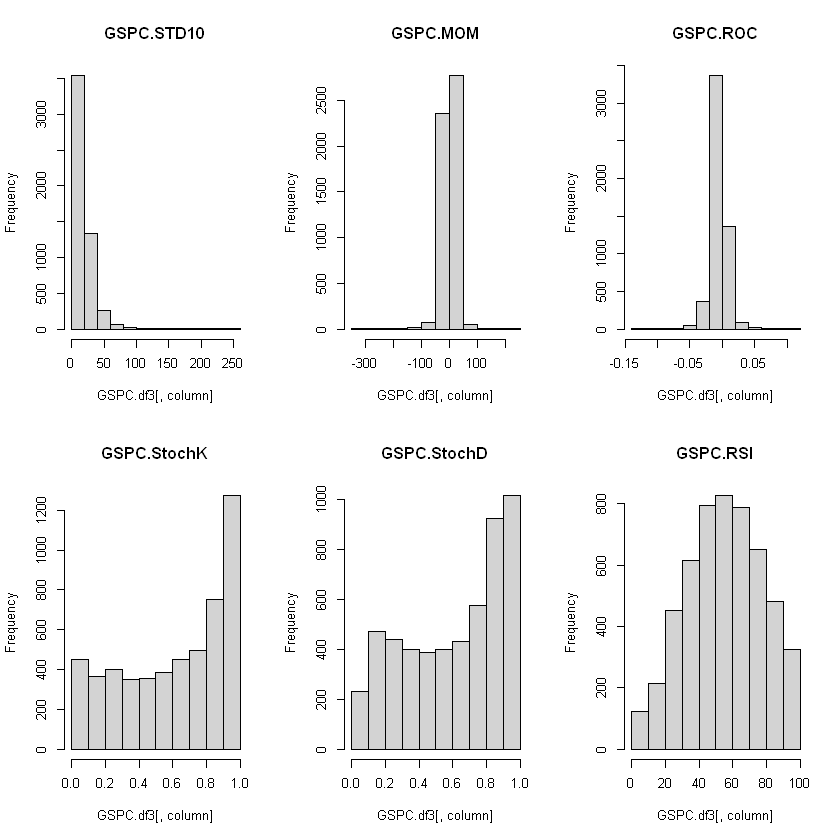

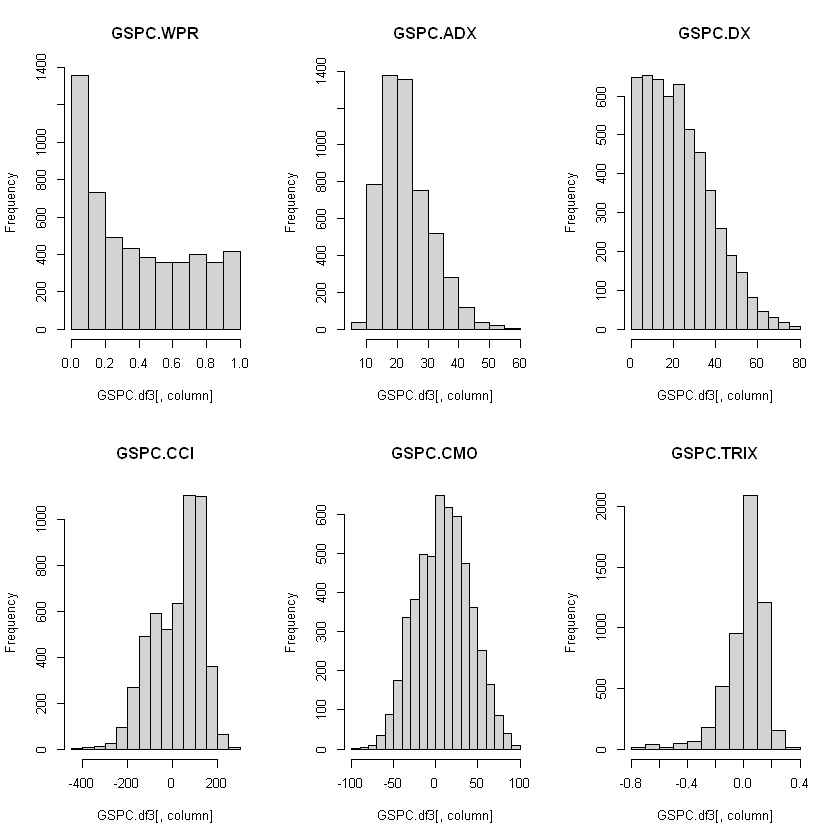

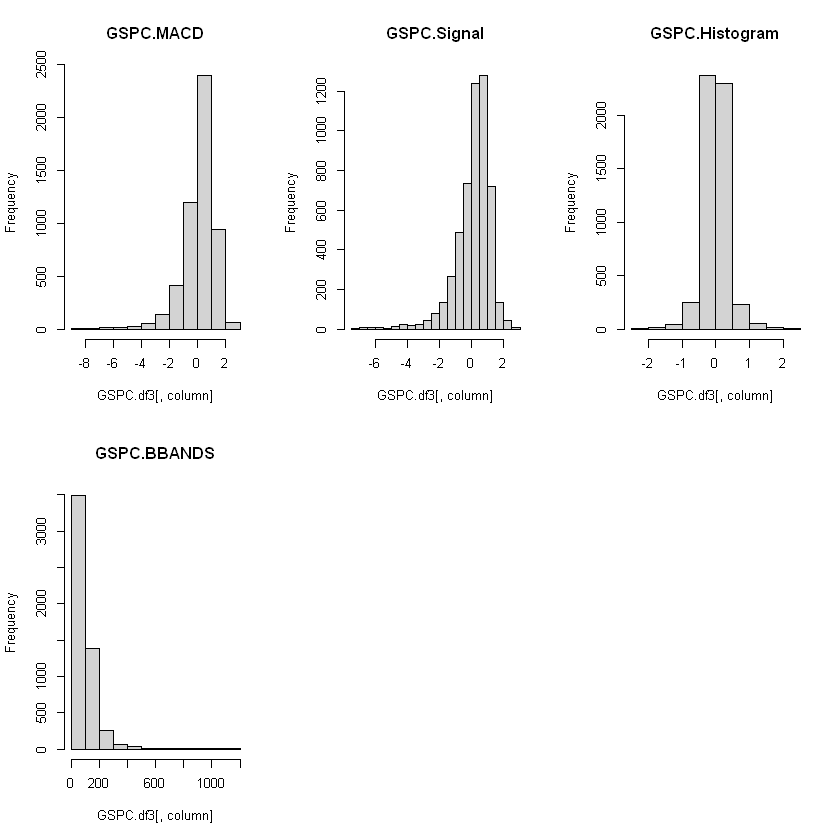

In [28]:
par(mfrow=c(2, 3))

for (column in colnames(GSPC.df3)){
    hist(GSPC.df3[,column], col = 'light grey', main = column, border = 'black')
}

## 4.5. Densidades

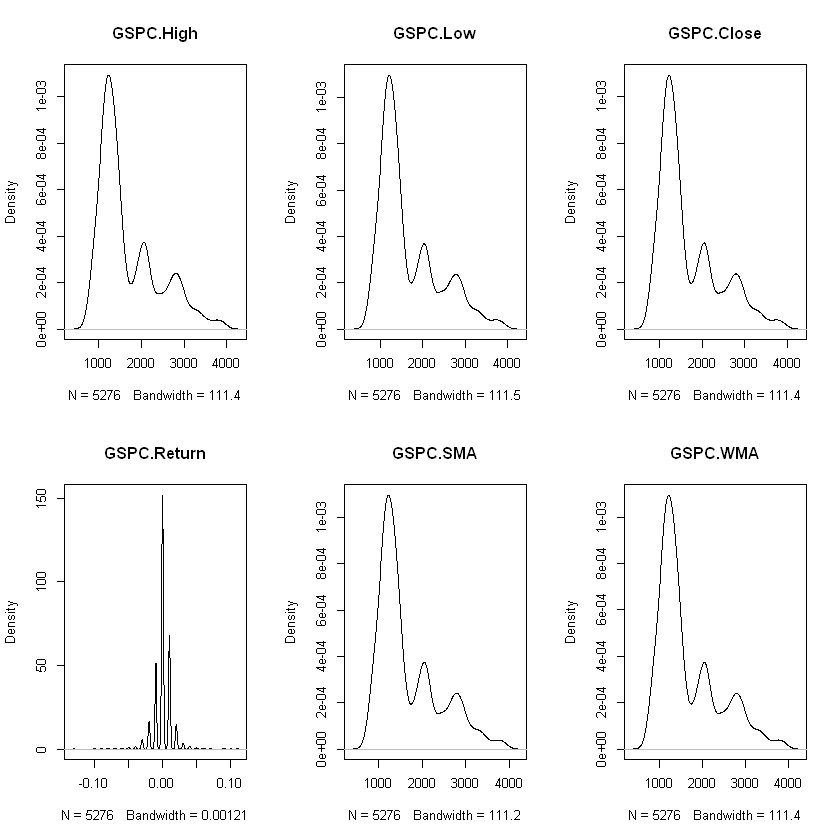

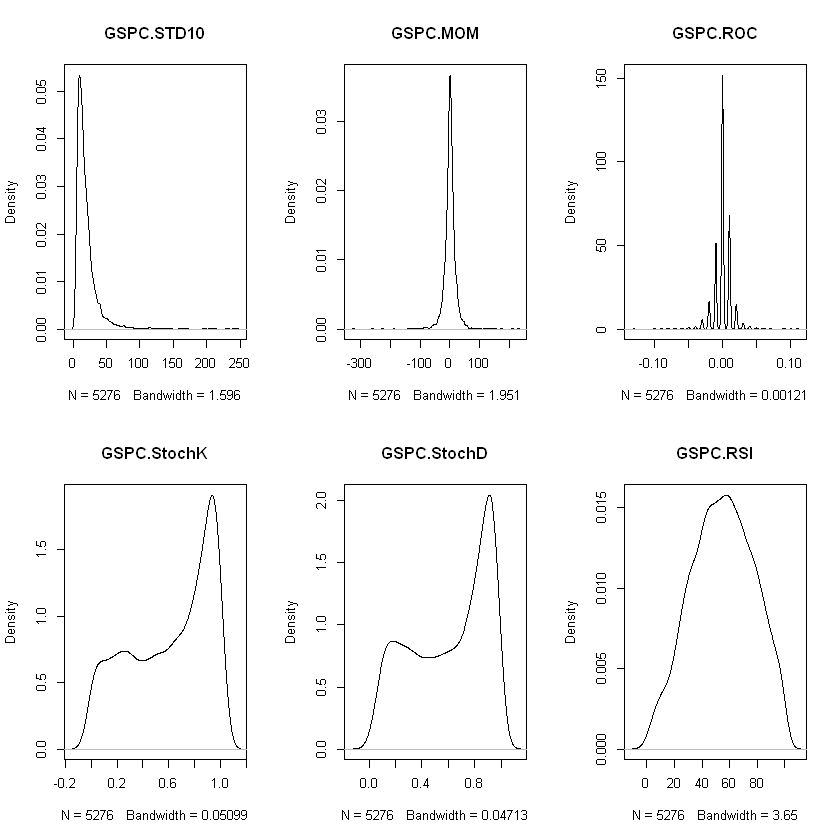

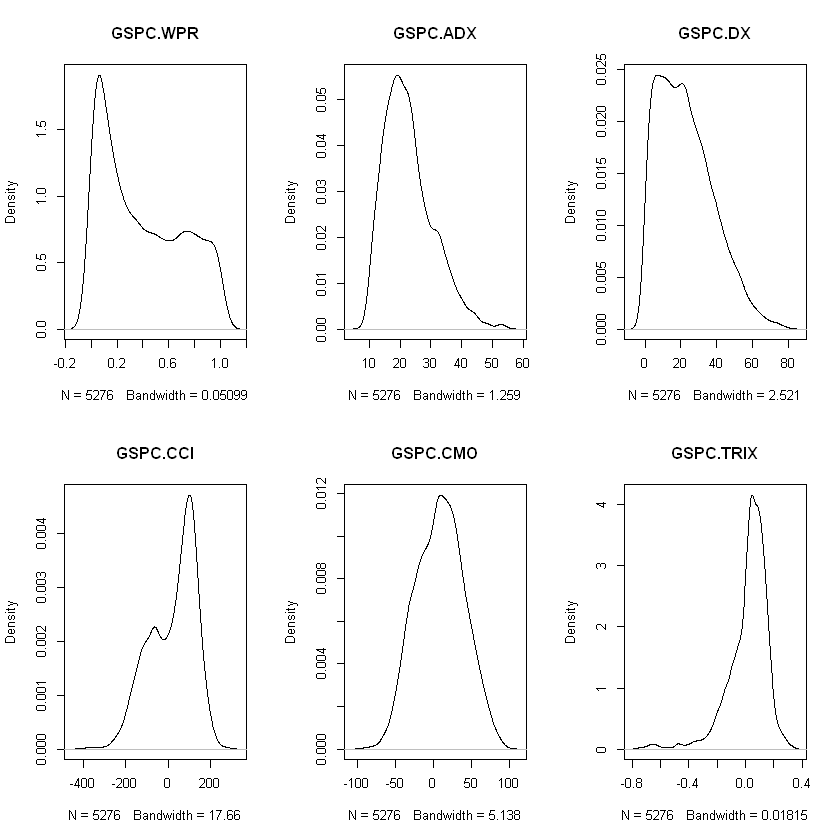

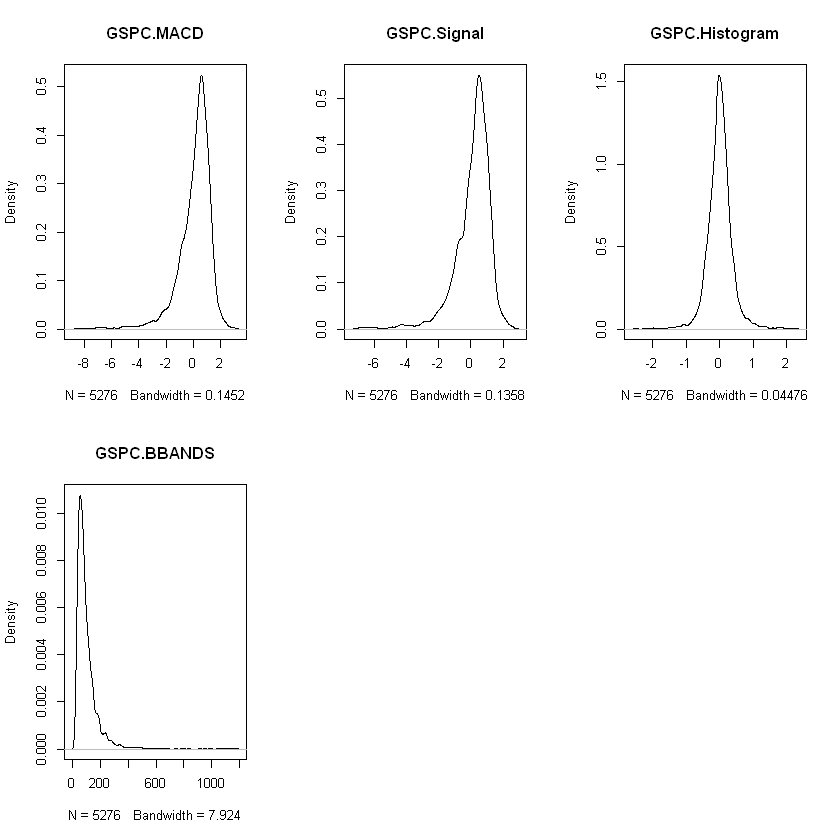

In [29]:
par(mfrow=c(2, 3))

for (column in colnames(GSPC.df3)){
    plot(density(GSPC.df3[,column]), main = column)
}

## 4.6. QQPlot

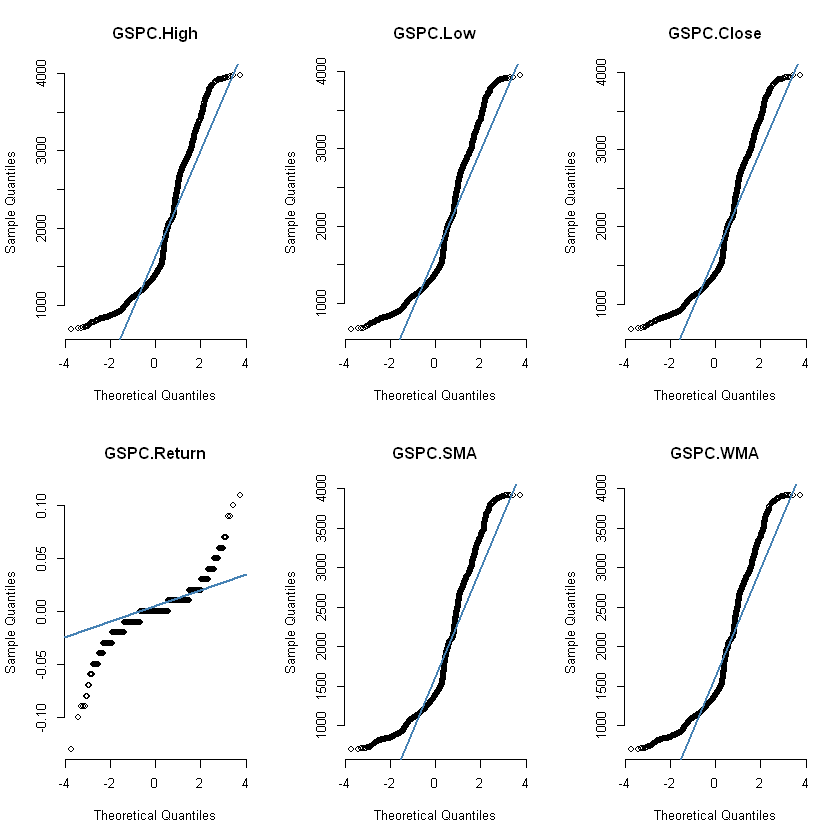

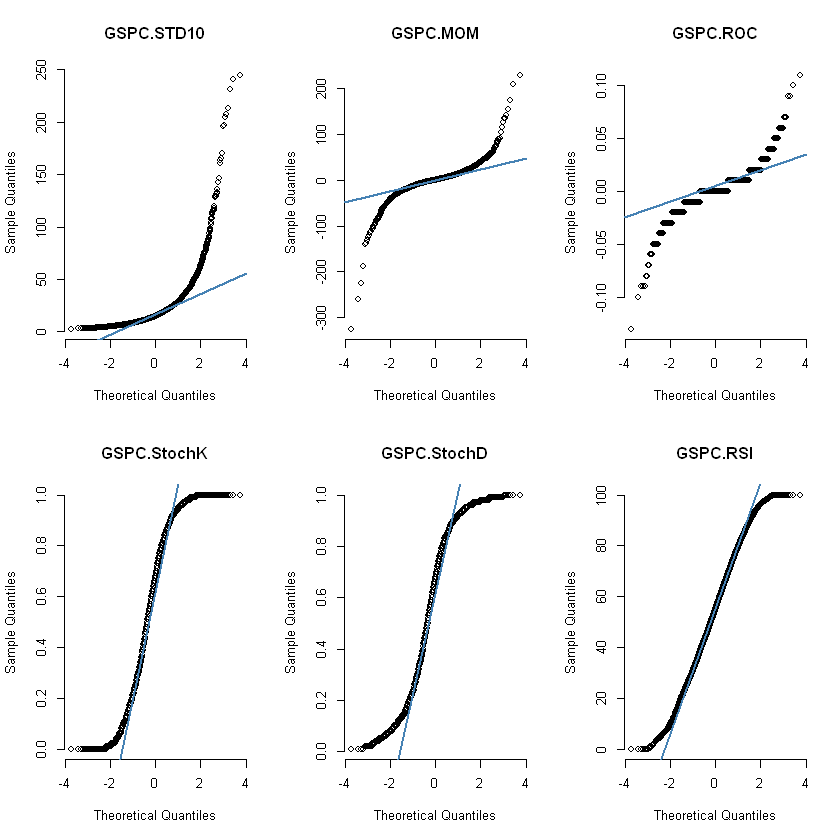

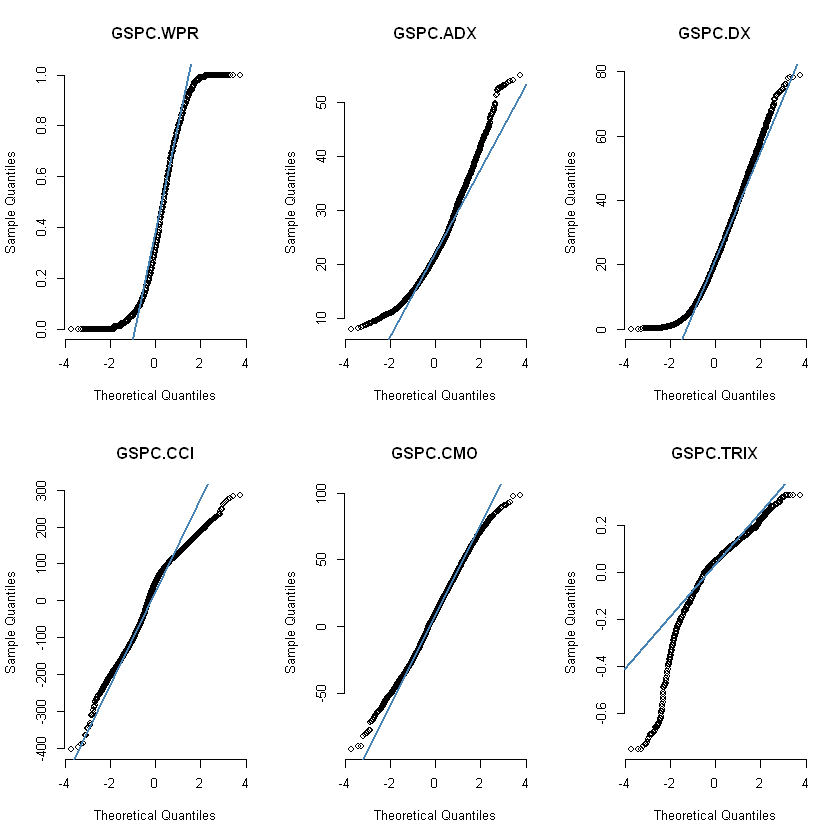

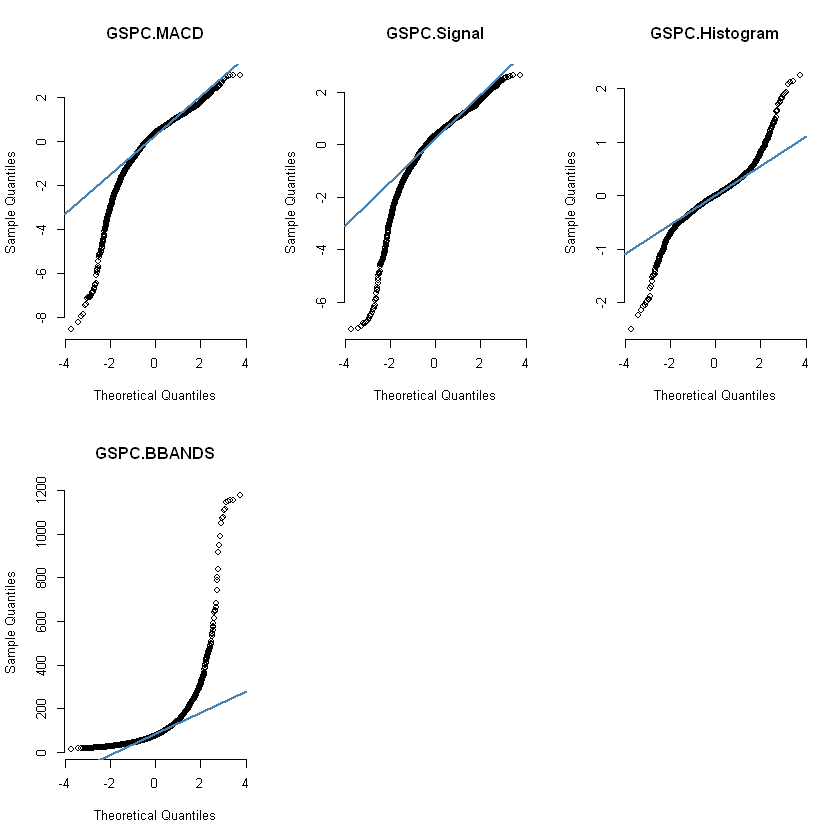

In [30]:
par(mfrow=c(2,3))

for (column in colnames(GSPC.df3)){
    qqnorm(GSPC.df3[,column], pch = 1, frame = FALSE, main = column)
    qqline(GSPC.df3[,column], col = "steelblue", lwd = 2)
}

## 4.6. Análise de correlação

In [31]:
# Package
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


In [32]:
# Cálculo das correlações
round(cor(GSPC.df3), digits = 2)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
GSPC.High,1.00,1.00,1.00,0.02,1.00,1.00,0.38,0.04,0.02,0.16,...,-0.16,-0.06,-0.03,0.14,0.17,0.22,0.19,0.20,0.00,0.40
GSPC.Low,1.00,1.00,1.00,0.02,1.00,1.00,0.37,0.04,0.02,0.17,...,-0.17,-0.07,-0.04,0.15,0.18,0.23,0.20,0.21,0.01,0.39
GSPC.Close,1.00,1.00,1.00,0.03,1.00,1.00,0.37,0.05,0.03,0.17,...,-0.17,-0.06,-0.04,0.15,0.18,0.22,0.19,0.20,0.01,0.40
GSPC.Return,0.02,0.02,0.03,1.00,0.01,0.01,-0.04,0.88,1.00,0.38,...,-0.38,0.00,-0.10,0.25,0.21,-0.01,0.05,0.00,0.16,-0.01
GSPC.SMA,1.00,1.00,1.00,0.01,1.00,1.00,0.39,0.02,0.01,0.14,...,-0.14,-0.06,-0.03,0.12,0.15,0.22,0.18,0.20,-0.02,0.40
GSPC.WMA,1.00,1.00,1.00,0.01,1.00,1.00,0.38,0.03,0.01,0.15,...,-0.15,-0.06,-0.03,0.12,0.16,0.22,0.18,0.20,-0.01,0.40
GSPC.STD10,0.38,0.37,0.37,-0.04,0.39,0.38,1.00,-0.04,-0.04,-0.12,...,0.12,0.26,0.23,-0.18,-0.22,-0.35,-0.43,-0.41,-0.15,0.85
GSPC.MOM,0.04,0.04,0.05,0.88,0.02,0.03,-0.04,1.00,0.88,0.37,...,-0.37,-0.01,-0.09,0.25,0.21,-0.01,0.05,0.00,0.16,-0.01
GSPC.ROC,0.02,0.02,0.03,1.00,0.01,0.01,-0.04,0.88,1.00,0.38,...,-0.38,0.00,-0.10,0.25,0.21,-0.01,0.05,0.00,0.16,-0.01
GSPC.StochK,0.16,0.17,0.17,0.38,0.14,0.15,-0.12,0.37,0.38,1.00,...,-1.00,-0.06,-0.16,0.91,0.81,0.16,0.47,0.28,0.67,-0.03


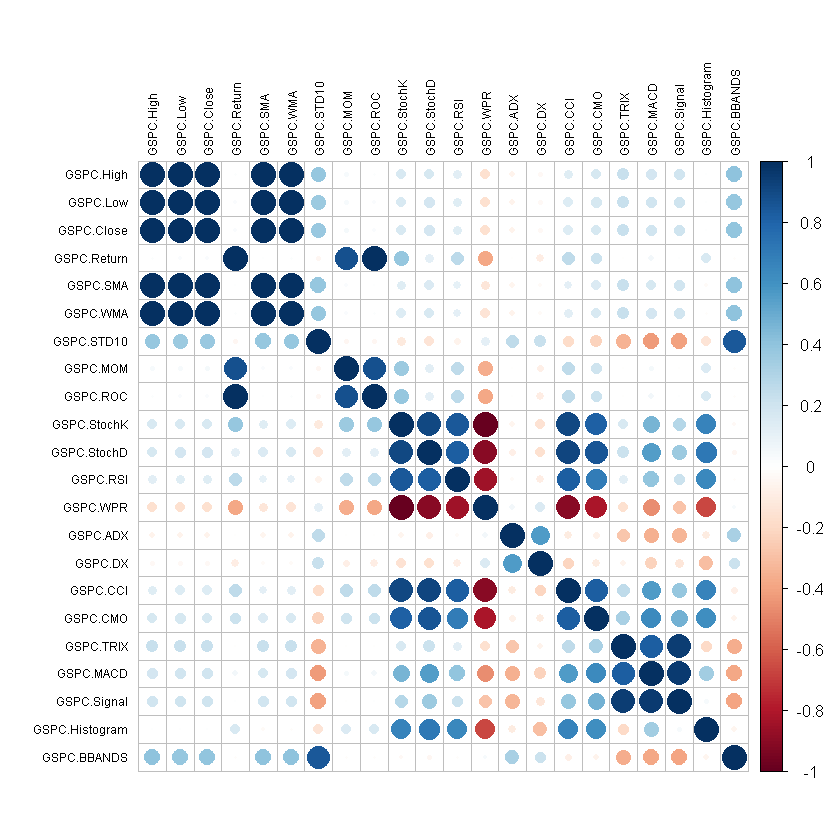

In [33]:
# Matriz de correlação
corrplot(cor(GSPC.df3), method = "circle", tl.col = "black", tl.cex = 0.6, tl.srt=90)

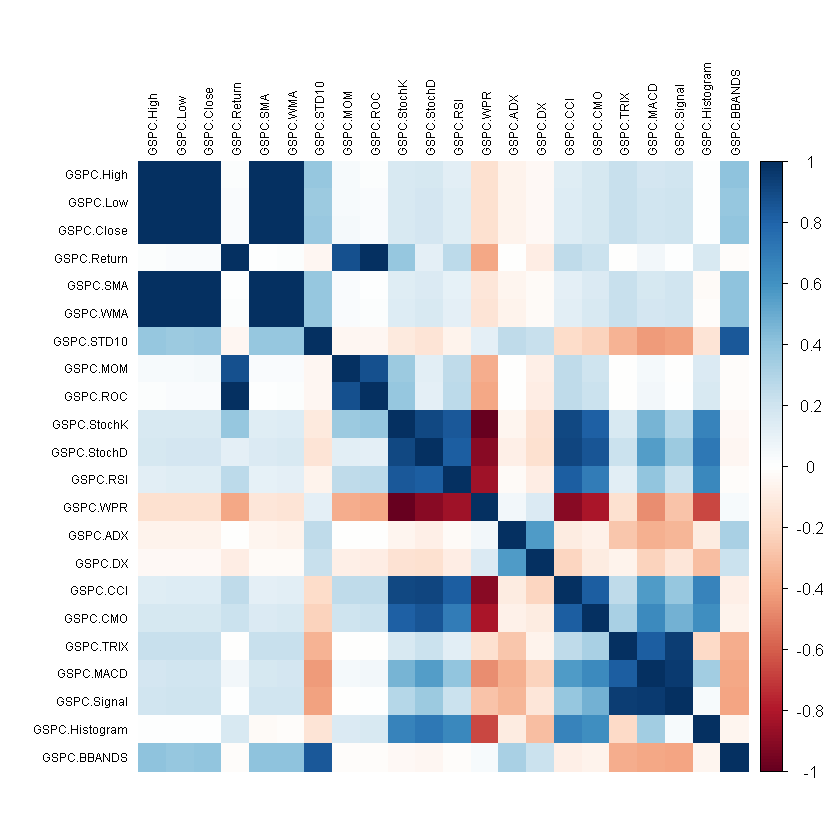

In [34]:
# Matriz de correlação
corrplot(cor(GSPC.df3), method = "color", tl.col = "black", tl.cex = 0.6, tl.srt=90)

# 5. Preprocessamento dos dados

## 5.1. Remoção dos *missing values*

A remoção dos dados ausentes foi realizada na seção anterior (análise exploratória de dados).

## 5.2. Tratamento dos outliers

In [35]:
# Função para substituição dos outliers pelos limietes do boxplot
outlier <- function(x){
    q1 = quantile(x, probs = .25, na.rm = T)
    q3 =  quantile(x, probs = .75, na.rm = T)
    iqr =  q3 - q1 
    li = q1 - 1.5*iqr
    ls = q3 + 1.5*iqr
    
    x[x < li] = li
    x[x > ls] = ls
    
    return (x)    
}

In [36]:
# Remoção dos outliers
GSPC.bp <- GSPC.df3
for (column in colnames(GSPC.df3)){
    GSPC.bp[,column] <- outlier(GSPC.df3[,column])
}

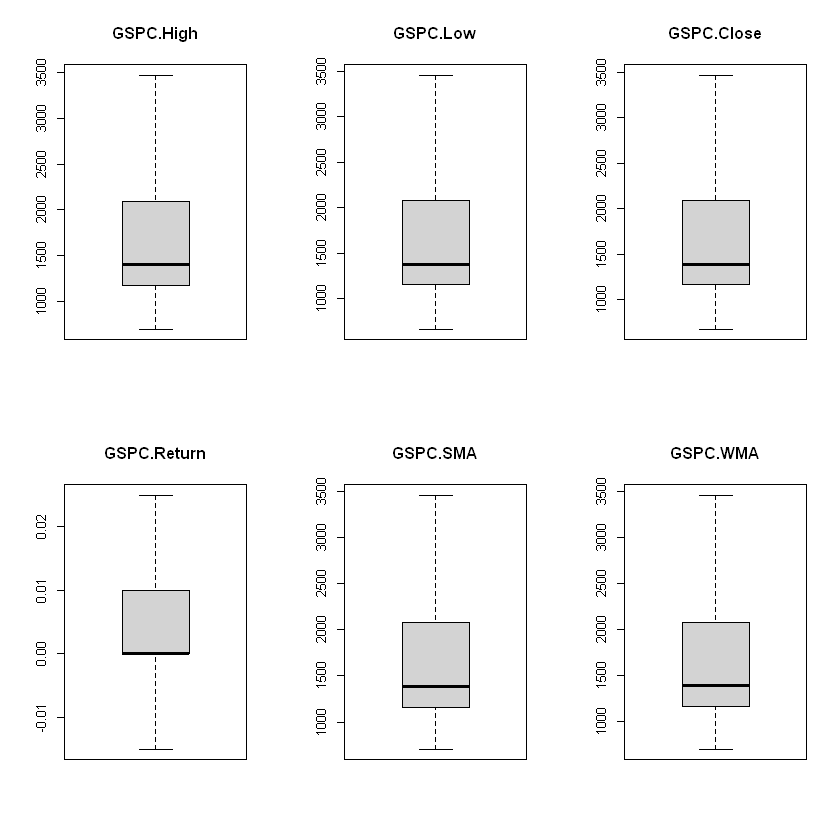

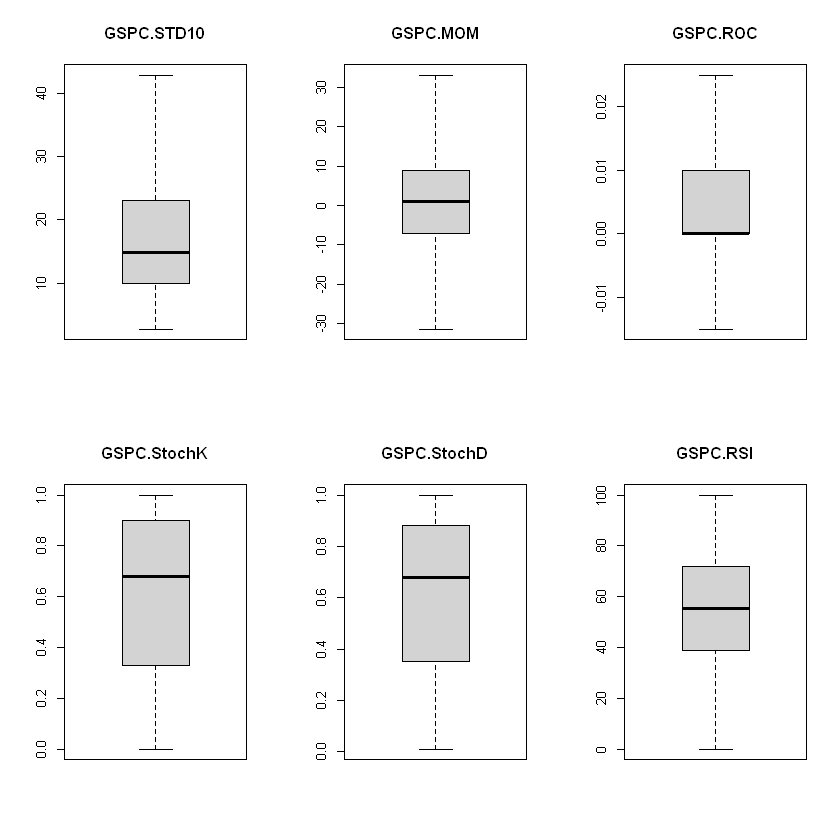

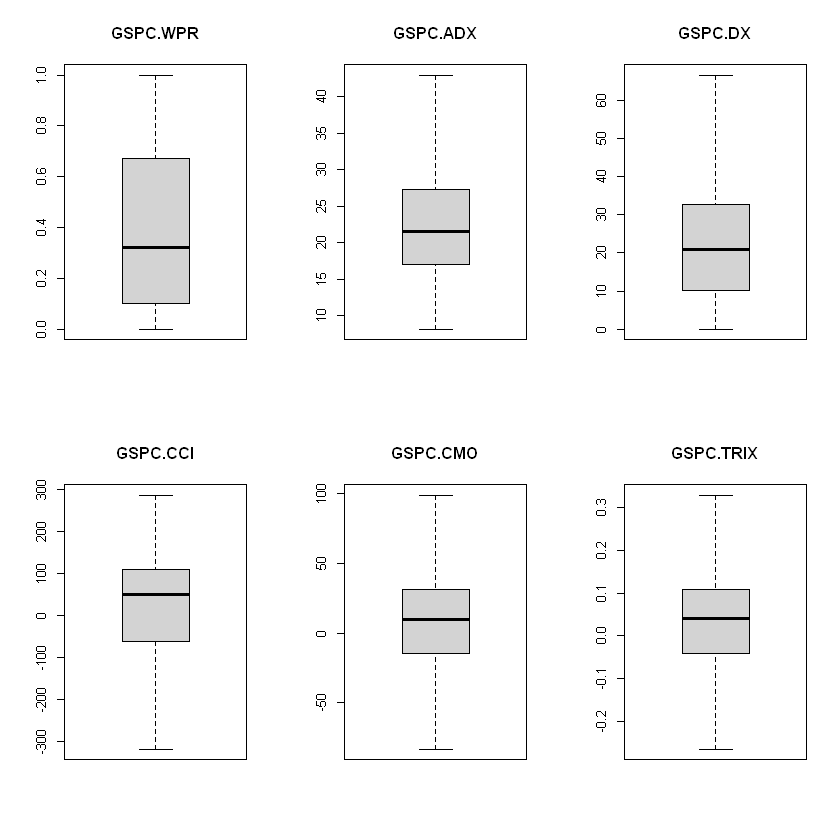

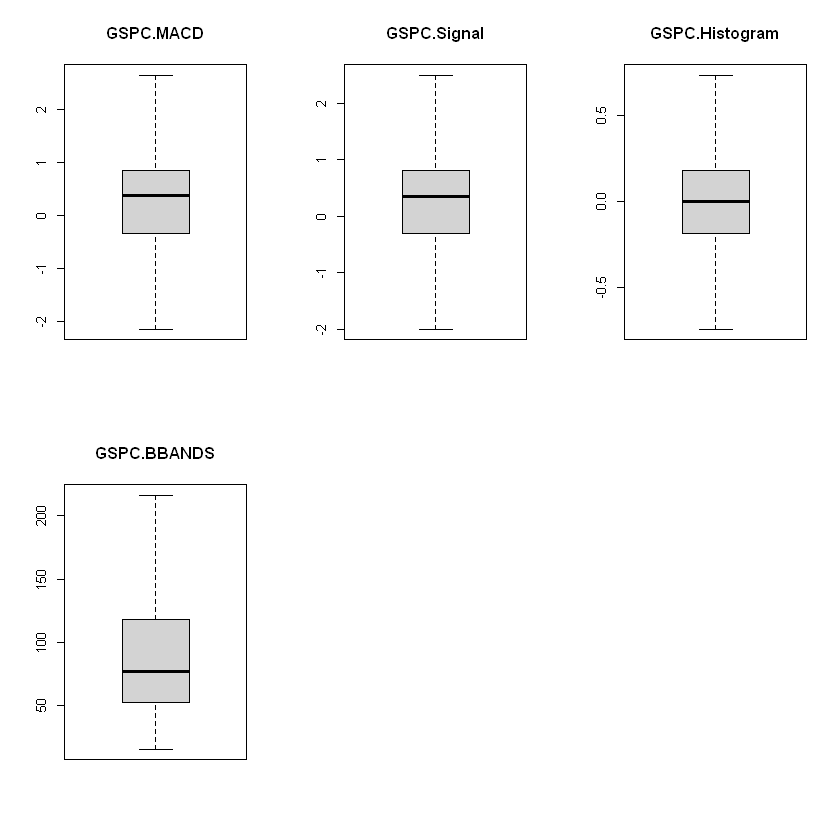

In [37]:
# Boxplot
par(mfrow=c(2, 3))

for (column in colnames(GSPC.bp)){
    boxplot(GSPC.bp[,column], col='light grey', main=column, border='black', horizontal=FALSE)
}

## 5.3. Normalização

**Normalização z-score**

In [38]:
# Função para normalização dos dados
normalize.zscore = function(x) {
    return ((x - mean(x)) / sd(x))
}

In [39]:
# Normalização z-score
GSPC.zscore <- GSPC.bp
for (column in colnames(GSPC.bp)){
    GSPC.zscore[,column] <- normalize.zscore(GSPC.bp[,column])
}

In [40]:
head(GSPC.zscore)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
59,-0.2112578,-0.2072186,-0.2138890,-0.08162153,-0.2896030,-0.2517377,2.3826320,-0.2985039352,-0.08162153,0.7955321,...,-0.7955321,0.4692135,1.5707645,0.9952310,1.6374322,0.2902797,2.255336,1.252678,2.3921019,2.377888
60,-0.2217216,-0.2236753,-0.2371648,-1.15820947,-0.2680871,-0.2419324,2.3751187,-1.1525578444,-1.15820947,0.5094290,...,-0.5094290,0.5871471,1.0640153,0.7296114,1.2974819,0.5439889,2.275896,1.482324,2.3921019,2.377888
61,-0.2302279,-0.2376281,-0.2360248,-0.08162153,-0.2512334,-0.2358149,0.9535462,0.0007216562,-0.08162153,0.5094290,...,-0.5094290,0.6376900,0.6460444,0.5796306,1.0796864,0.7131284,2.265616,1.668228,2.2136544,2.377888
62,-0.2360858,-0.2706573,-0.2657507,-1.15820947,-0.2469765,-0.2381722,0.6549206,-1.4572362940,-1.15820947,0.1915367,...,-0.1915367,0.5547477,-0.2618271,0.3431049,0.8375861,0.8822679,2.111414,1.788518,1.3700846,2.377888
63,-0.2325882,-0.2565453,-0.2503684,0.99496642,-0.2420246,-0.2385049,0.3419839,0.6734680316,0.99496642,0.3504829,...,-0.3504829,0.4873571,-0.1989695,0.3699891,1.1090414,0.9668377,2.018893,1.854131,0.8834097,2.377888
64,-0.2507524,-0.2528111,-0.2397045,-0.08162153,-0.2348864,-0.2377962,-0.3783431,0.4505824543,-0.08162153,0.4776398,...,-0.4776398,0.4238544,-0.1989695,0.3131824,1.6207030,1.1359771,1.967493,1.908809,0.5589597,2.377888


**Normalização min-max**

In [41]:
# Função para normalização dos dados
normalize.minmax = function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [42]:
# Normalização - dados sem outliers
GSPC.minmax <- GSPC.bp
for (column in colnames(GSPC.bp)){
    GSPC.minmax[,column] <- normalize.minmax(GSPC.bp[,column])
}

In [43]:
head(GSPC.minmax)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
59,0.3018940,0.3051379,0.3037534,0.375,0.2769714,0.2881157,1.0000000,0.4306417,0.375,0.86,...,0.14,0.5236249,0.7041858,0.7415612,0.7923945,0.5462185,0.9437500,0.7402561,1.0000000,1
60,0.2992791,0.3010642,0.2979711,0.125,0.2823694,0.2905697,0.9980381,0.2364383,0.125,0.77,...,0.23,0.5497630,0.5870213,0.6937421,0.7330708,0.5966387,0.9479167,0.7870267,1.0000000,1
61,0.2971535,0.2976104,0.2982543,0.375,0.2865976,0.2921007,0.6268257,0.4986826,0.375,0.77,...,0.23,0.5609651,0.4903830,0.6667413,0.6950639,0.6302521,0.9458333,0.8248886,0.9628378,1
62,0.2956896,0.2894344,0.2908695,0.125,0.2876656,0.2915107,0.5488462,0.1671575,0.125,0.67,...,0.33,0.5425822,0.2804757,0.6241599,0.6528157,0.6638655,0.9145833,0.8493875,0.7871622,1
63,0.2965637,0.2929276,0.2946909,0.625,0.2889079,0.2914274,0.4671296,0.6516584,0.625,0.72,...,0.28,0.5276461,0.2950089,0.6289998,0.7001866,0.6806723,0.8958333,0.8627506,0.6858108,1
64,0.2920246,0.2938520,0.2973401,0.375,0.2906988,0.2916048,0.2790321,0.6009764,0.375,0.76,...,0.24,0.5135717,0.2950089,0.6187729,0.7894751,0.7142857,0.8854167,0.8738864,0.6182432,1


## 5.4. Seleção de atributos

In [44]:
Direction.df <- GSPC.df2[, (names(GSPC.df2) %in% v.direction)]

In [45]:
head(Direction.df)

,GSPC.Direction,GSPC.Trend
59,0,down
60,0,down
61,0,down
62,0,down
63,0,down
64,0,down


### 5.4.1. Classificação e seleção de atributos com base no algoritmo de *random forest*

In [46]:
# Package
library(Boruta)

Warning message:
"package 'Boruta' was built under R version 3.6.3"

**Dados z-score**

In [47]:
# Objeto de armazenamento dos resultados
set.seed(123)
GSPCboruta.zscore.output <- Boruta(Direction.df$GSPC.Trend ~., data = GSPC.zscore, doTrace = 0)
names(GSPCboruta.zscore.output)

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

In [48]:
# Obtenção das variáveis de significância
GSPCboruta.zscore.signif <- getSelectedAttributes(GSPCboruta.zscore.output, withTentative = TRUE)
print(GSPCboruta.zscore.signif)

 [1] "GSPC.High"      "GSPC.Low"       "GSPC.Close"     "GSPC.SMA"      
 [5] "GSPC.WMA"       "GSPC.STD10"     "GSPC.MOM"       "GSPC.StochK"   
 [9] "GSPC.StochD"    "GSPC.RSI"       "GSPC.WPR"       "GSPC.ADX"      
[13] "GSPC.DX"        "GSPC.CCI"       "GSPC.CMO"       "GSPC.TRIX"     
[17] "GSPC.MACD"      "GSPC.Signal"    "GSPC.Histogram" "GSPC.BBANDS"   


In [49]:
# Correção preliminar
GSPCboruta.zscore.roughfixmod <- TentativeRoughFix(GSPCboruta.zscore.output)
GSPCboruta.zscore.signif2 <- getSelectedAttributes(GSPCboruta.zscore.roughfixmod)
print(GSPCboruta.zscore.signif2)

Warning message in TentativeRoughFix(GSPCboruta.zscore.output):
"There are no Tentative attributes! Returning original object."

 [1] "GSPC.High"      "GSPC.Low"       "GSPC.Close"     "GSPC.SMA"      
 [5] "GSPC.WMA"       "GSPC.STD10"     "GSPC.MOM"       "GSPC.StochK"   
 [9] "GSPC.StochD"    "GSPC.RSI"       "GSPC.WPR"       "GSPC.ADX"      
[13] "GSPC.DX"        "GSPC.CCI"       "GSPC.CMO"       "GSPC.TRIX"     
[17] "GSPC.MACD"      "GSPC.Signal"    "GSPC.Histogram" "GSPC.BBANDS"   


In [50]:
# Score de importância das variáveis
GSPCboruta.zscore.imp <- attStats(GSPCboruta.zscore.roughfixmod)
GSPCboruta.zscore.imp2 <- GSPCboruta.zscore.imp[GSPCboruta.zscore.imp$decision != 'Rejected', c('meanImp', 'decision')]

# Exibição por ordem decrescente de importância
head(GSPCboruta.zscore.imp2[order(-GSPCboruta.zscore.imp2),])

Warning message in Ops.factor(left):
"'-' not meaningful for factors"

,meanImp,decision
GSPC.ADX,40.75802,Confirmed
GSPC.WMA,35.37977,Confirmed
GSPC.SMA,35.23315,Confirmed
GSPC.Signal,34.83894,Confirmed
GSPC.Close,34.32494,Confirmed
GSPC.TRIX,33.89897,Confirmed


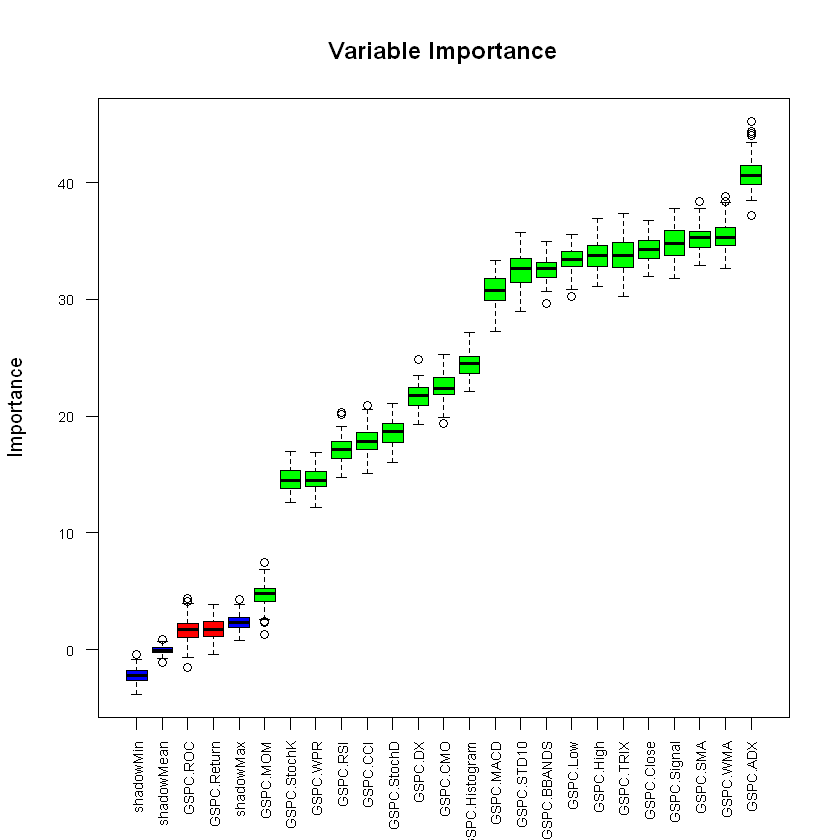

In [51]:
# Análise Gráfica
plot(GSPCboruta.zscore.output, cex.axis = .7, las = 2, xlab = "", main = "Variable Importance")

Somente as variáveis `GSPC.CMO`, `GSPC.MOM`, `GSPC.RSI`, `GSPC.StochK`, `GSPC.WPR` não foram rejeitadas.

**Dados minmax**

In [52]:
# Objeto de armazenamento dos resultados
set.seed(123)
GSPCboruta.minmax.output <- Boruta(Direction.df$GSPC.Trend ~., data = GSPC.minmax, doTrace = 0)
names(GSPCboruta.minmax.output)

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

In [53]:
# Obtenção das variáveis de significância
GSPCboruta.minmax.signif <- getSelectedAttributes(GSPCboruta.minmax.output, withTentative = TRUE)
print(GSPCboruta.minmax.signif)

 [1] "GSPC.High"      "GSPC.Low"       "GSPC.Close"     "GSPC.SMA"      
 [5] "GSPC.WMA"       "GSPC.STD10"     "GSPC.MOM"       "GSPC.StochK"   
 [9] "GSPC.StochD"    "GSPC.RSI"       "GSPC.WPR"       "GSPC.ADX"      
[13] "GSPC.DX"        "GSPC.CCI"       "GSPC.CMO"       "GSPC.TRIX"     
[17] "GSPC.MACD"      "GSPC.Signal"    "GSPC.Histogram" "GSPC.BBANDS"   


In [54]:
# Correção preliminar
GSPCboruta.minmax.roughfixmod <- TentativeRoughFix(GSPCboruta.minmax.output)
GSPCboruta.minmax.signif2 <- getSelectedAttributes(GSPCboruta.minmax.roughfixmod)
print(GSPCboruta.minmax.signif2)

Warning message in TentativeRoughFix(GSPCboruta.minmax.output):
"There are no Tentative attributes! Returning original object."

 [1] "GSPC.High"      "GSPC.Low"       "GSPC.Close"     "GSPC.SMA"      
 [5] "GSPC.WMA"       "GSPC.STD10"     "GSPC.MOM"       "GSPC.StochK"   
 [9] "GSPC.StochD"    "GSPC.RSI"       "GSPC.WPR"       "GSPC.ADX"      
[13] "GSPC.DX"        "GSPC.CCI"       "GSPC.CMO"       "GSPC.TRIX"     
[17] "GSPC.MACD"      "GSPC.Signal"    "GSPC.Histogram" "GSPC.BBANDS"   


In [55]:
# Score de importância das variáveis
GSPCboruta.minmax.imp <- attStats(GSPCboruta.minmax.roughfixmod)
GSPCboruta.minmax.imp2 <- GSPCboruta.zscore.imp[GSPCboruta.minmax.imp$decision != 'Rejected', c('meanImp', 'decision')]

# Exibição por ordem decrescente de importância
head(GSPCboruta.minmax.imp2[order(-GSPCboruta.minmax.imp2),])

Warning message in Ops.factor(left):
"'-' not meaningful for factors"

,meanImp,decision
GSPC.ADX,40.75802,Confirmed
GSPC.WMA,35.37977,Confirmed
GSPC.SMA,35.23315,Confirmed
GSPC.Signal,34.83894,Confirmed
GSPC.Close,34.32494,Confirmed
GSPC.TRIX,33.89897,Confirmed


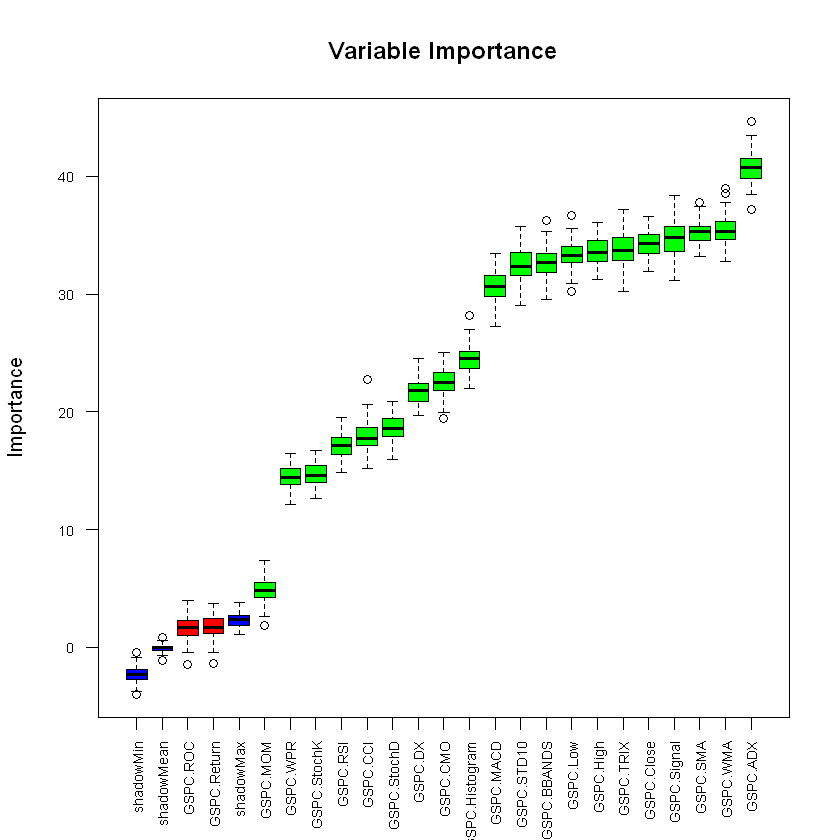

In [56]:
# Análise Gráfica
plot(GSPCboruta.minmax.output, cex.axis = .7, las = 2, xlab = "", main = "Variable Importance")

Somente as variáveis `GSPC.MOM`, `GSPC.RSI`, `GSPC.StochK`, `GSPC.WPR` não foram rejeitadas.

### 5.4.2. Classificação e seleção de atributos com base no algoritmo *Recursive Feature Elimination* (RFE)

In [57]:
# Package
library(caret)
library(e1071)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'e1071' was built under R version 3.6.3"

In [58]:
# Definição do controle por meio de uma função de seleção random forest
control <- rfeControl(functions = rfFuncs, method = "cv", number = 10)

**Dados z-score**

In [59]:
GSPCrfe.zscore.output <- rfe(Direction.df$GSPC.Trend~., GSPC.zscore, rfeControl = control)

In [60]:
# Resultado da seleção
print(GSPCrfe.zscore.output)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         4   0.7377 0.4132    0.01477 0.03296         
         8   0.8880 0.7565    0.01853 0.04054        *
        16   0.8848 0.7489    0.01303 0.02809         
        22   0.8711 0.7166    0.01771 0.03959         

The top 5 variables (out of 8):
   GSPC.ADX, GSPC.TRIX, GSPC.Signal, GSPC.STD10, GSPC.BBANDS



In [61]:
# Lista dos atributos escolhidos (de acordo com a variável de interesse)
predictors(GSPCrfe.zscore.output)

[1] "GSPC.ADX"    "GSPC.TRIX"   "GSPC.Signal" "GSPC.STD10"  "GSPC.BBANDS"
[6] "GSPC.MACD"   "GSPC.WMA"    "GSPC.SMA"

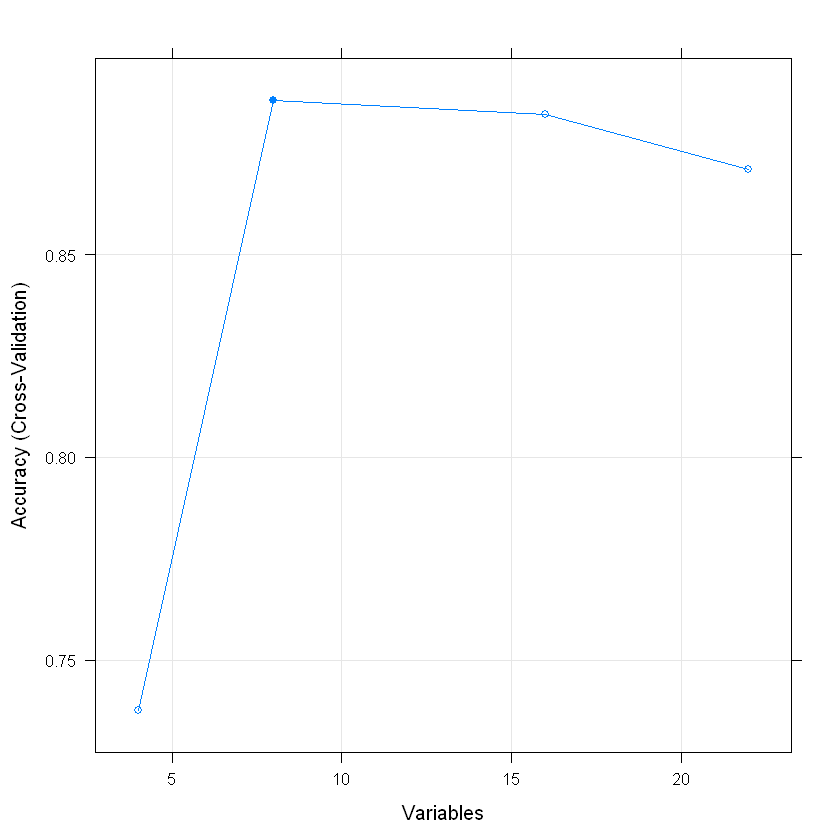

In [62]:
plot(GSPCrfe.zscore.output, type=c("g", "o"))

Todas as *features* foram consideradas.

**Dados minmax**

In [63]:
GSPCrfe.minmax.output <- rfe(Direction.df$GSPC.Trend~., GSPC.minmax, rfeControl = control)

In [64]:
# Resultado da seleção
print(GSPCrfe.minmax.output)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         4   0.7403 0.4153   0.018402 0.04603         
         8   0.8897 0.7594   0.005528 0.01269        *
        16   0.8829 0.7442   0.008537 0.01899         
        22   0.8702 0.7141   0.011298 0.02512         

The top 5 variables (out of 8):
   GSPC.ADX, GSPC.TRIX, GSPC.Signal, GSPC.STD10, GSPC.BBANDS



In [65]:
# Lista dos atributos escolhidos (de acordo com a variável de interesse)
predictors(GSPCrfe.minmax.output)

[1] "GSPC.ADX"    "GSPC.TRIX"   "GSPC.Signal" "GSPC.STD10"  "GSPC.BBANDS"
[6] "GSPC.MACD"   "GSPC.WMA"    "GSPC.Close"

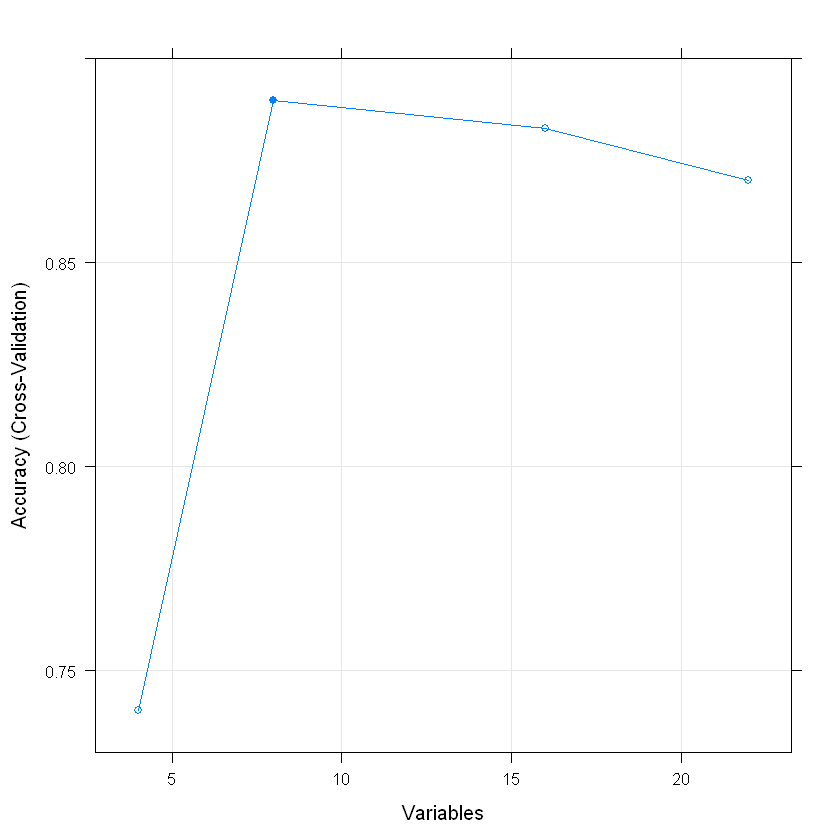

In [66]:
plot(GSPCrfe.minmax.output, type=c("g", "o"))

Todas as *features* foram consideradas

### 5.4.3. Seleção de atributos utilizando Análise de Componentes Principais (PCA)

**Dados z-score**

In [67]:
# Magnitude completa (variância completa)
GSPC.zscore.pca <- prcomp(x = GSPC.zscore, center = TRUE, scale. = TRUE)
summary(GSPC.zscore.pca)

# PCA com maior proporção de variância: PCA1 (35.33%)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.7366 2.2827 1.8094 1.5004 1.22974 0.81630 0.66063
Proportion of Variance 0.3404 0.2369 0.1488 0.1023 0.06874 0.03029 0.01984
Cumulative Proportion  0.3404 0.5773 0.7261 0.8284 0.89716 0.92745 0.94728
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.58569 0.47111 0.42320 0.34647 0.34185 0.30478 0.20783
Proportion of Variance 0.01559 0.01009 0.00814 0.00546 0.00531 0.00422 0.00196
Cumulative Proportion  0.96288 0.97296 0.98111 0.98656 0.99187 0.99610 0.99806
                          PC15    PC16    PC17    PC18     PC19     PC20
Standard deviation     0.19091 0.07390 0.02482 0.01035 0.006975 0.003964
Proportion of Variance 0.00166 0.00025 0.00003 0.00000 0.000000 0.000000
Cumulative Proportion  0.99972 0.99996 0.99999 1.00000 1.000000 1.000000
                            PC21      PC22
Standard deviation     

A função `prcomp` fornece 4 outputs:

* Sdev: definição do desvio padrão dos pontos projetados sobre os PCAs (diminui do PCA1 até o PCA18)

* Rotation: definição dos eixos dos componentes principais. `Rotation` é a matriz *rotation*, que fornece os pesos utilizados para projetar os pontos originais para as 2 novas direções.

* Center: média das features de input no espaço de features originais (sem qualquer transformação).

* Scale: desvio padrão das features de input no espaço de features originais (sem qualquer transformação).

In [68]:
print('Sdev')
round(GSPC.zscore.pca$sdev, 4)

[1] "Sdev"


[1] 2.7366 2.2827 1.8094 1.5004 1.2297 0.8163 0.6606 0.5857 0.4711 0.4232
[11] 0.3465 0.3419 0.3048 0.2078 0.1909 0.0739 0.0248 0.0103 0.0070 0.0040
[21] 0.0000 0.0000

In [69]:
print('Rotation')
round(GSPC.zscore.pca$rotation, 4)

[1] "Rotation"


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
GSPC.High,0.1807,0.3748,-0.0281,-0.0342,-0.0592,0.1359,0.0047,-0.0154,0.0367,-0.0082,...,-0.0093,0.0072,-0.0010,0.0031,0.1836,-0.7527,-0.4477,-0.0149,0.0000,0.0000
GSPC.Low,0.1839,0.3719,-0.0317,-0.0360,-0.0608,0.1432,0.0029,-0.0166,0.0391,-0.0060,...,-0.0085,0.0084,-0.0122,-0.0102,0.5281,0.6131,-0.3709,0.0822,0.0000,0.0000
GSPC.Close,0.1836,0.3725,-0.0261,-0.0392,-0.0597,0.1399,0.0041,-0.0166,0.0375,-0.0062,...,-0.0034,0.0060,-0.0037,-0.0066,0.3383,-0.1376,0.8124,0.0829,0.0000,0.0000
GSPC.Return,0.1217,-0.0734,0.3742,-0.4102,0.0254,-0.0333,0.0359,-0.0683,0.0884,-0.0180,...,-0.0626,-0.0124,0.0041,-0.0033,0.0029,0.0019,-0.0008,0.0002,0.6739,-0.2140
GSPC.SMA,0.1734,0.3793,-0.0322,-0.0403,-0.0539,0.1396,0.0033,-0.0256,0.0247,-0.0124,...,-0.0015,0.0110,0.0334,0.0147,-0.6290,0.1158,-0.0276,0.6230,0.0000,0.0000
GSPC.WMA,0.1764,0.3774,-0.0324,-0.0378,-0.0558,0.1388,0.0034,-0.0245,0.0330,-0.0098,...,0.0003,0.0062,0.0230,0.0019,-0.4182,0.1582,0.0341,-0.7733,0.0000,0.0000
GSPC.STD10,-0.0165,0.2676,0.2551,0.1779,0.0529,-0.5833,-0.2186,0.3043,0.1894,-0.4420,...,0.0077,0.0045,0.0087,0.0043,0.0021,0.0046,0.0008,0.0002,0.0000,0.0000
GSPC.MOM,0.1413,-0.0589,0.3493,-0.3965,0.0200,0.0068,-0.0003,-0.0089,-0.0048,0.0437,...,0.0640,-0.2021,0.0418,0.0039,-0.0102,-0.0017,-0.0067,-0.0013,0.0000,0.0000
GSPC.ROC,0.1217,-0.0734,0.3742,-0.4102,0.0254,-0.0333,0.0359,-0.0683,0.0884,-0.0180,...,-0.0626,-0.0124,0.0041,-0.0033,0.0029,0.0019,-0.0008,0.0002,-0.6739,0.2140
GSPC.StochK,0.3246,-0.1346,0.1166,0.0955,0.0061,0.0657,-0.0922,0.1123,-0.2971,-0.1808,...,0.3035,0.3068,-0.0242,-0.0024,-0.0009,-0.0005,-0.0012,-0.0014,-0.2140,-0.6739


In [70]:
print('Center')
round(GSPC.zscore.pca$center, 4)

[1] "Center"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
             0              0              0              0              0 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
             0              0              0              0              0 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
             0              0              0              0              0 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
             0              0              0              0              0 
GSPC.Histogram    GSPC.BBANDS 
             0              0

In [71]:
print('Scale')
round(GSPC.zscore.pca$scale, 4)

[1] "Scale"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
             1              1              1              1              1 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
             1              1              1              1              1 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
             1              1              1              1              1 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
             1              1              1              1              1 
GSPC.Histogram    GSPC.BBANDS 
             1              1

In [72]:
# scores para as dimensões
head(round(GSPC.zscore.pca$x, 4))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
59,3.1276,-0.4458,0.5525,2.4503,2.2466,-3.2616,-0.2200,-0.8876,1.3376,0.1051,...,-0.0434,0.3829,-0.0253,-0.2225,0.0337,0.0045,-0.0002,-0.0028,0,0
60,2.2314,-0.0211,-0.8775,3.2282,1.9790,-3.4428,0.2973,-0.6610,1.2131,-0.1596,...,0.1204,0.4785,-0.2024,-0.1324,0.0023,0.0083,-0.0006,0.0004,0,0
61,2.6516,-0.6026,-0.1689,1.4281,1.8417,-2.7811,0.8171,-0.7825,1.1550,0.7386,...,0.1975,0.3049,-0.1030,-0.0416,-0.0277,0.0058,-0.0018,0.0032,0,0
62,1.2309,-0.0421,-2.0214,1.9991,1.2794,-2.8404,1.5871,-0.6582,0.1044,0.1912,...,0.1545,0.4377,-0.1022,-0.0174,-0.0230,-0.0088,0.0008,-0.0015,0,0
63,2.1640,-0.5599,0.2027,-0.7909,1.5819,-2.7346,1.6222,-0.9704,0.0011,0.4380,...,0.0377,0.1004,0.0675,0.0169,-0.0125,-0.0025,-0.0116,-0.0008,0,0
64,1.8447,-0.5274,-1.0484,-0.1736,1.6166,-2.3011,1.8940,-1.4332,-0.9249,0.3238,...,0.2446,0.1849,-0.0858,0.0013,-0.0076,0.0034,0.0059,0.0011,0,0


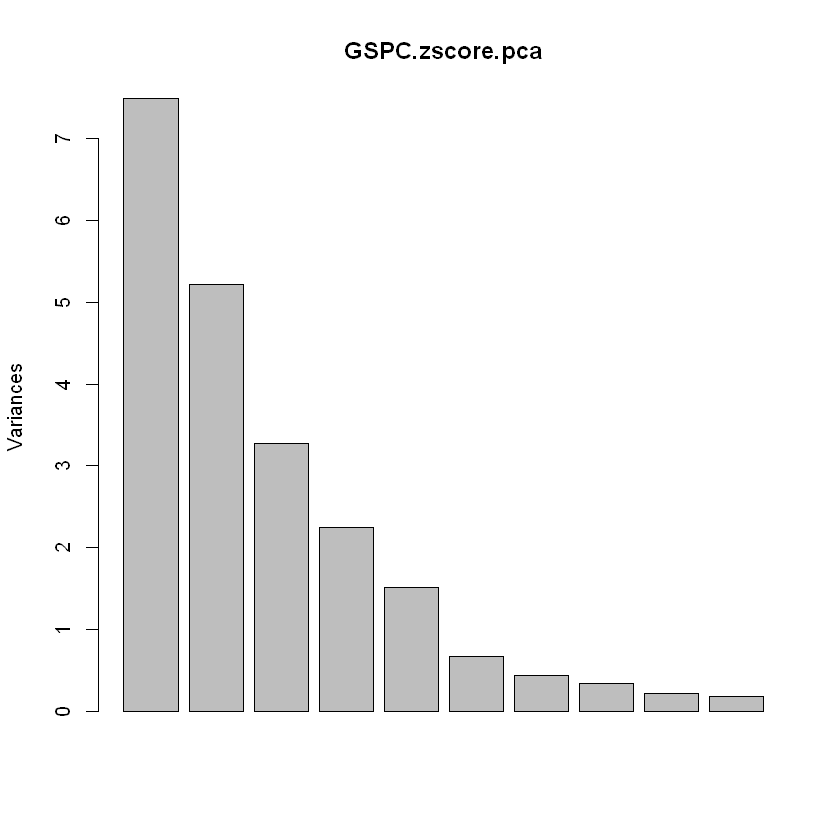

In [73]:
# gráfico da dominância dos PCAs
plot(GSPC.zscore.pca)

In [74]:
# Visualização dos dados na nova dimensão reduzida
GSPC.zscore.pcar <- princomp(GSPC.zscore)
loadings(GSPC.zscore.pcar)


Loadings:
               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
GSPC.High       0.181  0.375                       0.136                     
GSPC.Low        0.184  0.372                       0.143                     
GSPC.Close      0.184  0.372                       0.140                     
GSPC.Return     0.122        -0.374  0.410                                   
GSPC.SMA        0.173  0.379                       0.140                     
GSPC.WMA        0.176  0.377                       0.139                     
GSPC.STD10             0.268 -0.255 -0.178        -0.583 -0.219 -0.304  0.189
GSPC.MOM        0.141        -0.349  0.397                                   
GSPC.ROC        0.122        -0.374  0.410                                   
GSPC.StochK     0.325 -0.135 -0.117                             -0.112 -0.297
GSPC.StochD     0.317 -0.122        -0.235                             -0.130
GSPC.RSI        0.287 -0.124        -0.167           

In [75]:
# Valores das novas features para os primeiros 5 casos
GSPC.zscore.pcar$scores[1:5,]

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17,Comp.18,Comp.19,Comp.20,Comp.21,Comp.22
59,3.127643,-0.44577864,-0.5525029,-2.450297,-2.246601,-3.261641,-0.2199975,0.8876168,1.337551627,-0.1050716,...,0.04342130,0.3829387,0.02525737,-0.22254814,0.033668279,-0.004513993,0.0001588084,0.0027787034,-4.281364e-15,2.779262e-14
60,2.231391,-0.02107059,0.8774828,-3.228191,-1.978991,-3.442776,0.2972864,0.6609513,1.213132159,0.1595506,...,-0.12044622,0.4785270,0.20238187,-0.13244364,0.002253483,-0.008287312,0.0006248526,-0.0003977850,9.323135e-15,-1.251950e-14
61,2.651648,-0.60256706,0.1689382,-1.428068,-1.841719,-2.781118,0.8170744,0.7824657,1.154953410,-0.7385615,...,-0.19751843,0.3048621,0.10295339,-0.04157747,-0.027686788,-0.005848699,0.0017513305,-0.0032243853,2.029018e-14,-4.524745e-14
62,1.230919,-0.04210012,2.0213599,-1.999066,-1.279386,-2.840418,1.5871026,0.6582070,0.104352311,-0.1911503,...,-0.15447048,0.4376802,0.10216164,-0.01735073,-0.023018982,0.008756423,-0.0008464453,0.0014558665,-8.418956e-15,3.109719e-14
63,2.164027,-0.55991182,-0.2026521,0.790949,-1.581865,-2.734592,1.6222145,0.9704305,0.001145099,-0.4380476,...,-0.03774558,0.1004132,-0.06748478,0.01691758,-0.012524227,0.002508797,0.0116289664,0.0008339489,5.777318e-14,-5.660071e-15


No PCA1 os atributos `GSPC.STD10`, `GSPC.ADX`, `GSPC.DX`, `GSPC.BBANDS` foram desconsiderados.

**Dados minmax**

In [76]:
# Magnitude completa (variância completa)
GSPC.minmax.pca <- prcomp(x = GSPC.minmax, center = TRUE, scale. = TRUE)
summary(GSPC.minmax.pca)

# PCA com maior proporção de variância: PCA1 (35.33%)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.7366 2.2827 1.8094 1.5004 1.22974 0.81630 0.66063
Proportion of Variance 0.3404 0.2369 0.1488 0.1023 0.06874 0.03029 0.01984
Cumulative Proportion  0.3404 0.5773 0.7261 0.8284 0.89716 0.92745 0.94728
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.58569 0.47111 0.42320 0.34647 0.34185 0.30478 0.20783
Proportion of Variance 0.01559 0.01009 0.00814 0.00546 0.00531 0.00422 0.00196
Cumulative Proportion  0.96288 0.97296 0.98111 0.98656 0.99187 0.99610 0.99806
                          PC15    PC16    PC17    PC18     PC19     PC20
Standard deviation     0.19091 0.07390 0.02482 0.01035 0.006975 0.003964
Proportion of Variance 0.00166 0.00025 0.00003 0.00000 0.000000 0.000000
Cumulative Proportion  0.99972 0.99996 0.99999 1.00000 1.000000 1.000000
                            PC21      PC22
Standard deviation     

In [77]:
print('Sdev')
round(GSPC.minmax.pca$sdev, 4)

[1] "Sdev"


[1] 2.7366 2.2827 1.8094 1.5004 1.2297 0.8163 0.6606 0.5857 0.4711 0.4232
[11] 0.3465 0.3419 0.3048 0.2078 0.1909 0.0739 0.0248 0.0103 0.0070 0.0040
[21] 0.0000 0.0000

In [78]:
print('Rotation')
round(GSPC.minmax.pca$rotation, 4)

[1] "Rotation"


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
GSPC.High,0.1807,0.3748,-0.0281,-0.0342,-0.0592,0.1359,0.0047,-0.0154,0.0367,-0.0082,...,-0.0093,0.0072,-0.0010,0.0031,0.1836,-0.7527,-0.4477,-0.0149,0.0000,0.0000
GSPC.Low,0.1839,0.3719,-0.0317,-0.0360,-0.0608,0.1432,0.0029,-0.0166,0.0391,-0.0060,...,-0.0085,0.0084,-0.0122,-0.0102,0.5281,0.6131,-0.3709,0.0822,0.0000,0.0000
GSPC.Close,0.1836,0.3725,-0.0261,-0.0392,-0.0597,0.1399,0.0041,-0.0166,0.0375,-0.0062,...,-0.0034,0.0060,-0.0037,-0.0066,0.3383,-0.1376,0.8124,0.0829,0.0000,0.0000
GSPC.Return,0.1217,-0.0734,0.3742,-0.4102,0.0254,-0.0333,0.0359,-0.0683,0.0884,-0.0180,...,-0.0626,-0.0124,0.0041,-0.0033,0.0029,0.0019,-0.0008,0.0002,-0.0022,0.7071
GSPC.SMA,0.1734,0.3793,-0.0322,-0.0403,-0.0539,0.1396,0.0033,-0.0256,0.0247,-0.0124,...,-0.0015,0.0110,0.0334,0.0147,-0.6290,0.1158,-0.0276,0.6230,0.0000,0.0000
GSPC.WMA,0.1764,0.3774,-0.0324,-0.0378,-0.0558,0.1388,0.0034,-0.0245,0.0330,-0.0098,...,0.0003,0.0062,0.0230,0.0019,-0.4182,0.1582,0.0341,-0.7733,0.0000,0.0000
GSPC.STD10,-0.0165,0.2676,0.2551,0.1779,0.0529,-0.5833,-0.2186,0.3043,0.1894,-0.4420,...,0.0077,0.0045,0.0087,0.0043,0.0021,0.0046,0.0008,0.0002,0.0000,0.0000
GSPC.MOM,0.1413,-0.0589,0.3493,-0.3965,0.0200,0.0068,-0.0003,-0.0089,-0.0048,0.0437,...,0.0640,-0.2021,0.0418,0.0039,-0.0102,-0.0017,-0.0067,-0.0013,0.0000,0.0000
GSPC.ROC,0.1217,-0.0734,0.3742,-0.4102,0.0254,-0.0333,0.0359,-0.0683,0.0884,-0.0180,...,-0.0626,-0.0124,0.0041,-0.0033,0.0029,0.0019,-0.0008,0.0002,0.0022,-0.7071
GSPC.StochK,0.3246,-0.1346,0.1166,0.0955,0.0061,0.0657,-0.0922,0.1123,-0.2971,-0.1808,...,0.3035,0.3068,-0.0242,-0.0024,-0.0009,-0.0005,-0.0012,-0.0014,0.7071,0.0022


In [79]:
print('Center')
round(GSPC.minmax.pca$center, 4)

[1] "Center"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
        0.3547         0.3564         0.3569         0.3940         0.3496 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
        0.3511         0.3778         0.4985         0.3940         0.6097 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
        0.6058         0.5496         0.3903         0.4196         0.3410 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
        0.5624         0.5067         0.4885         0.4867         0.4851 
GSPC.Histogram    GSPC.BBANDS 
        0.5018         0.3800

In [80]:
print('Scale')
round(GSPC.minmax.pca$scale, 4)

[1] "Scale"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
        0.2499         0.2475         0.2484         0.2322         0.2509 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
        0.2503         0.2611         0.2274         0.2322         0.3146 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
        0.2937         0.2252         0.3146         0.2216         0.2312 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
        0.1800         0.1745         0.1987         0.2027         0.2037 
GSPC.Histogram    GSPC.BBANDS 
        0.2083         0.2607

In [81]:
# scores para as dimensões
head(round(GSPC.minmax.pca$x, 4))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
59,3.1276,-0.4458,0.5525,2.4503,2.2466,-3.2616,-0.2200,-0.8876,1.3376,0.1051,...,-0.0434,0.3829,-0.0253,-0.2225,0.0337,0.0045,-0.0002,-0.0028,0,0
60,2.2314,-0.0211,-0.8775,3.2282,1.9790,-3.4428,0.2973,-0.6610,1.2131,-0.1596,...,0.1204,0.4785,-0.2024,-0.1324,0.0023,0.0083,-0.0006,0.0004,0,0
61,2.6516,-0.6026,-0.1689,1.4281,1.8417,-2.7811,0.8171,-0.7825,1.1550,0.7386,...,0.1975,0.3049,-0.1030,-0.0416,-0.0277,0.0058,-0.0018,0.0032,0,0
62,1.2309,-0.0421,-2.0214,1.9991,1.2794,-2.8404,1.5871,-0.6582,0.1044,0.1912,...,0.1545,0.4377,-0.1022,-0.0174,-0.0230,-0.0088,0.0008,-0.0015,0,0
63,2.1640,-0.5599,0.2027,-0.7909,1.5819,-2.7346,1.6222,-0.9704,0.0011,0.4380,...,0.0377,0.1004,0.0675,0.0169,-0.0125,-0.0025,-0.0116,-0.0008,0,0
64,1.8447,-0.5274,-1.0484,-0.1736,1.6166,-2.3011,1.8940,-1.4332,-0.9249,0.3238,...,0.2446,0.1849,-0.0858,0.0013,-0.0076,0.0034,0.0059,0.0011,0,0


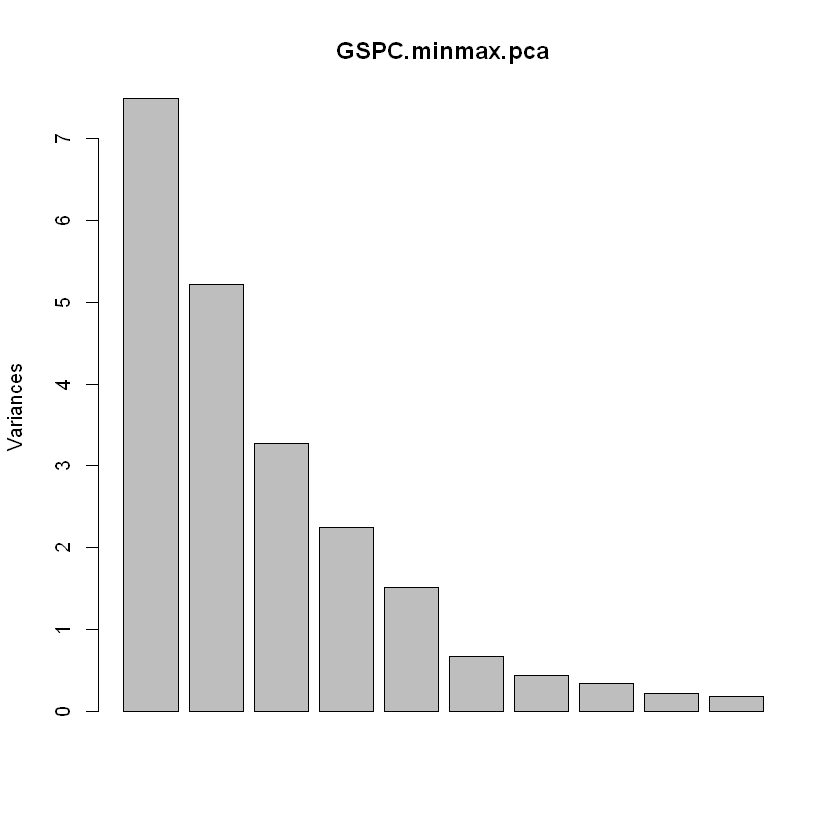

In [82]:
# gráfico da dominância dos PCAs
plot(GSPC.minmax.pca)

In [83]:
# Visualização dos dados na nova dimensão reduzida
GSPC.minmax.pcar <- princomp(GSPC.minmax)
loadings(GSPC.minmax.pcar)


Loadings:
               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
GSPC.High       0.183  0.371                       0.132                     
GSPC.Low        0.184  0.364                       0.137                     
GSPC.Close      0.185  0.366                       0.135                     
GSPC.Return     0.122        -0.389  0.394                              0.108
GSPC.SMA        0.176  0.377                       0.136                     
GSPC.WMA        0.179  0.374                       0.135                     
GSPC.STD10             0.280 -0.313 -0.257        -0.530 -0.312 -0.424  0.166
GSPC.MOM        0.137        -0.351  0.377                                   
GSPC.ROC        0.122        -0.389  0.394                              0.108
GSPC.StochK     0.425 -0.179                                           -0.354
GSPC.StochD     0.379 -0.149  0.101 -0.256                                   
GSPC.RSI        0.267 -0.116        -0.138           

In [84]:
# Valores das novas features para os primeiros 5 casos
GSPC.minmax.pcar$scores[1:5,]

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17,Comp.18,Comp.19,Comp.20,Comp.21,Comp.22
59,0.6815795,-0.04047659,-0.22820286,-0.68609600,-0.4200448,-0.7502723,-0.04595735,0.1776176,0.324272770,0.028493156,...,-0.086993343,0.06866333,-0.0125317523,-0.045238199,0.008325952,-0.0011319314,4.560645e-05,0.0006945415,4.101633e-15,1.342039e-14
60,0.4485652,0.06425249,0.08790619,-0.85878718,-0.3539908,-0.7936862,0.05975484,0.1166202,0.263596676,0.087940017,...,-0.112360835,0.07526662,0.0185086210,-0.026852151,0.000497158,-0.0020607137,1.654895e-04,-0.0001003087,-1.261674e-15,-1.644720e-15
61,0.5375658,-0.08563198,-0.05916367,-0.42283648,-0.3645405,-0.6475246,0.22837465,0.2166419,0.253294726,-0.114351104,...,-0.060215285,0.02603603,0.0033655583,-0.008359667,-0.006936248,-0.0014415821,4.424737e-04,-0.0008073134,-5.692107e-15,-1.524212e-14
62,0.1942985,0.04030171,0.34787858,-0.54821997,-0.2385419,-0.6700480,0.39160298,0.1762976,-0.008481169,0.005247543,...,-0.076274429,0.06691231,-0.0001971268,-0.003367554,-0.005727579,0.0021855533,-2.210110e-04,0.0003651832,3.867529e-15,7.259832e-15
63,0.4160478,-0.08424564,-0.18399036,0.06855148,-0.3383481,-0.6598047,0.41452690,0.2544545,0.004849258,-0.040035179,...,-0.003221371,0.01076114,-0.0206786678,0.003502590,-0.003107719,0.0006580714,2.887608e-03,0.0002097961,-7.082569e-16,3.089840e-15


No PCA1 os atributos `GSPC.STD10`, `GSPC.ADX`, `GSPC.DX`, `GSPC.TRIX`, `GSPC.BBANDS` foram desconsiderados.

# 6. Separação dos dados de treino e de teste

In [85]:
# Biblioteca(s) Necessária(s)
library(keras)

Warning message:
"package 'keras' was built under R version 3.6.3"

## 6.1. Amostra pós seleção de atributos

**Dados z-score**

In [86]:
# Nova amostra a partir da seleção de atributos (considerando todos os atributos que foram desconsiderados)
GSPC.zscore2 <- GSPC.zscore[, !(names(GSPC.zscore) %in% c('GSPC.STD10', 'GSPC.ADX', 'GSPC.DX', 'GSPC.BBANDS'))]
head(GSPC.zscore2)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram
59,-0.2112578,-0.2072186,-0.2138890,-0.08162153,-0.2896030,-0.2517377,-0.2985039352,-0.08162153,0.7955321,0.9984460,1.4245326,-0.7955321,0.9952310,1.6374322,0.2902797,2.255336,1.252678,2.3921019
60,-0.2217216,-0.2236753,-0.2371648,-1.15820947,-0.2680871,-0.2419324,-1.1525578444,-1.15820947,0.5094290,0.7920827,0.7557174,-0.5094290,0.7296114,1.2974819,0.5439889,2.275896,1.482324,2.3921019
61,-0.2302279,-0.2376281,-0.2360248,-0.08162153,-0.2512334,-0.2358149,0.0007216562,-0.08162153,0.5094290,0.6545072,1.0408299,-0.5094290,0.5796306,1.0796864,0.7131284,2.265616,1.668228,2.2136544
62,-0.2360858,-0.2706573,-0.2657507,-1.15820947,-0.2469765,-0.2381722,-1.4572362940,-1.15820947,0.1915367,0.4481439,-0.3971673,-0.1915367,0.3431049,0.8375861,0.8822679,2.111414,1.788518,1.3700846
63,-0.2325882,-0.2565453,-0.2503684,0.99496642,-0.2420246,-0.2385049,0.6734680316,0.99496642,0.3504829,0.3793562,-0.2785925,-0.3504829,0.3699891,1.1090414,0.9668377,2.018893,1.854131,0.8834097
64,-0.2507524,-0.2528111,-0.2397045,-0.08162153,-0.2348864,-0.2377962,0.4505824543,-0.08162153,0.4776398,0.3793562,-1.0211284,-0.4776398,0.3131824,1.6207030,1.1359771,1.967493,1.908809,0.5589597


In [87]:
GSPC.zscore3 <- as.data.frame(cbind(GSPC.zscore2, Direction.df))
head(GSPC.zscore3)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,-0.2112578,-0.2072186,-0.2138890,-0.08162153,-0.2896030,-0.2517377,-0.2985039352,-0.08162153,0.7955321,0.9984460,1.4245326,-0.7955321,0.9952310,1.6374322,0.2902797,2.255336,1.252678,2.3921019,0,down
60,-0.2217216,-0.2236753,-0.2371648,-1.15820947,-0.2680871,-0.2419324,-1.1525578444,-1.15820947,0.5094290,0.7920827,0.7557174,-0.5094290,0.7296114,1.2974819,0.5439889,2.275896,1.482324,2.3921019,0,down
61,-0.2302279,-0.2376281,-0.2360248,-0.08162153,-0.2512334,-0.2358149,0.0007216562,-0.08162153,0.5094290,0.6545072,1.0408299,-0.5094290,0.5796306,1.0796864,0.7131284,2.265616,1.668228,2.2136544,0,down
62,-0.2360858,-0.2706573,-0.2657507,-1.15820947,-0.2469765,-0.2381722,-1.4572362940,-1.15820947,0.1915367,0.4481439,-0.3971673,-0.1915367,0.3431049,0.8375861,0.8822679,2.111414,1.788518,1.3700846,0,down
63,-0.2325882,-0.2565453,-0.2503684,0.99496642,-0.2420246,-0.2385049,0.6734680316,0.99496642,0.3504829,0.3793562,-0.2785925,-0.3504829,0.3699891,1.1090414,0.9668377,2.018893,1.854131,0.8834097,0,down
64,-0.2507524,-0.2528111,-0.2397045,-0.08162153,-0.2348864,-0.2377962,0.4505824543,-0.08162153,0.4776398,0.3793562,-1.0211284,-0.4776398,0.3131824,1.6207030,1.1359771,1.967493,1.908809,0.5589597,0,down


**Dados minmax**

In [88]:
# Nova amostra a partir da seleção de atributos (considerando todos os atributos que foram desconsiderados
GSPC.minmax2 <- GSPC.minmax[, !(names(GSPC.minmax) %in% c('GSPC.STD10', 'GSPC.ADX', 'GSPC.DX', 'GSPC.TRIX', 'GSPC.BBANDS'))]
head(GSPC.minmax2)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram
59,0.3018940,0.3051379,0.3037534,0.375,0.2769714,0.2881157,0.4306417,0.375,0.86,0.8989899,0.8704,0.14,0.7415612,0.7923945,0.9437500,0.7402561,1.0000000
60,0.2992791,0.3010642,0.2979711,0.125,0.2823694,0.2905697,0.2364383,0.125,0.77,0.8383838,0.7198,0.23,0.6937421,0.7330708,0.9479167,0.7870267,1.0000000
61,0.2971535,0.2976104,0.2982543,0.375,0.2865976,0.2921007,0.4986826,0.375,0.77,0.7979798,0.7840,0.23,0.6667413,0.6950639,0.9458333,0.8248886,0.9628378
62,0.2956896,0.2894344,0.2908695,0.125,0.2876656,0.2915107,0.1671575,0.125,0.67,0.7373737,0.4602,0.33,0.6241599,0.6528157,0.9145833,0.8493875,0.7871622
63,0.2965637,0.2929276,0.2946909,0.625,0.2889079,0.2914274,0.6516584,0.625,0.72,0.7171717,0.4869,0.28,0.6289998,0.7001866,0.8958333,0.8627506,0.6858108
64,0.2920246,0.2938520,0.2973401,0.375,0.2906988,0.2916048,0.6009764,0.375,0.76,0.7171717,0.3197,0.24,0.6187729,0.7894751,0.8854167,0.8738864,0.6182432


In [89]:
GSPC.minmax3 <- as.data.frame(cbind(GSPC.minmax2, Direction.df))
head(GSPC.minmax3)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,0.3018940,0.3051379,0.3037534,0.375,0.2769714,0.2881157,0.4306417,0.375,0.86,0.8989899,0.8704,0.14,0.7415612,0.7923945,0.9437500,0.7402561,1.0000000,0,down
60,0.2992791,0.3010642,0.2979711,0.125,0.2823694,0.2905697,0.2364383,0.125,0.77,0.8383838,0.7198,0.23,0.6937421,0.7330708,0.9479167,0.7870267,1.0000000,0,down
61,0.2971535,0.2976104,0.2982543,0.375,0.2865976,0.2921007,0.4986826,0.375,0.77,0.7979798,0.7840,0.23,0.6667413,0.6950639,0.9458333,0.8248886,0.9628378,0,down
62,0.2956896,0.2894344,0.2908695,0.125,0.2876656,0.2915107,0.1671575,0.125,0.67,0.7373737,0.4602,0.33,0.6241599,0.6528157,0.9145833,0.8493875,0.7871622,0,down
63,0.2965637,0.2929276,0.2946909,0.625,0.2889079,0.2914274,0.6516584,0.625,0.72,0.7171717,0.4869,0.28,0.6289998,0.7001866,0.8958333,0.8627506,0.6858108,0,down
64,0.2920246,0.2938520,0.2973401,0.375,0.2906988,0.2916048,0.6009764,0.375,0.76,0.7171717,0.3197,0.24,0.6187729,0.7894751,0.8854167,0.8738864,0.6182432,0,down


## 6.2. Separação das amostras

**Dados z-score**

In [90]:
# Determinação das amostras
GSPC.zscore.split <- sample(2, nrow(GSPC.zscore3), replace = TRUE, prob = c(0.70, 0.30))

In [91]:
# Separação das amostras (índice 1 = treino e indice 2 = teste)
GSPC.zscore.train <- GSPC.zscore3[GSPC.zscore.split == 1,]
GSPC.zscore.test <- GSPC.zscore3[GSPC.zscore.split == 2,]

In [92]:
head(GSPC.zscore.train)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,-0.2112578,-0.2072186,-0.2138890,-0.08162153,-0.2896030,-0.2517377,-0.2985039352,-0.08162153,0.79553207,0.9984460,1.4245326,-0.79553207,0.99523097,1.6374322,0.2902797,2.255336,1.252678,2.3921019,0,down
61,-0.2302279,-0.2376281,-0.2360248,-0.08162153,-0.2512334,-0.2358149,0.0007216562,-0.08162153,0.50942902,0.6545072,1.0408299,-0.50942902,0.57963065,1.0796864,0.7131284,2.265616,1.668228,2.2136544,0,down
63,-0.2325882,-0.2565453,-0.2503684,0.99496642,-0.2420246,-0.2385049,0.6734680316,0.99496642,0.35048287,0.3793562,-0.2785925,-0.35048287,0.36998910,1.1090414,0.9668377,2.018893,1.854131,0.8834097,0,down
64,-0.2507524,-0.2528111,-0.2397045,-0.08162153,-0.2348864,-0.2377962,0.4505824543,-0.08162153,0.47763979,0.3793562,-1.0211284,-0.47763979,0.31318241,1.6207030,1.1359771,1.967493,1.908809,0.5589597,0,down
65,-0.2230314,-0.3549238,-0.2559239,-1.15820947,-0.2347561,-0.2413250,-0.8192518894,-1.15820947,0.09616904,0.3449623,-1.2525047,-0.09616904,0.03513346,1.1772209,1.2205469,1.844131,1.919744,0.1371748,0,down
66,-0.2516734,-0.2657072,-0.2665445,-0.08162153,-0.2366818,-0.2468206,-0.5547882687,-0.08162153,-0.28530170,0.1042051,-1.3129023,0.28530170,0.13245059,0.2763682,1.3051166,1.679649,1.886938,-0.2846101,0,down


In [93]:
head(GSPC.zscore.test)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
60,-0.2217216,-0.2236753,-0.2371648,-1.15820947,-0.2680871,-0.2419324,-1.1525578,-1.15820947,0.50942902,0.79208273,0.75571742,-0.50942902,0.72961136,1.2974819,0.5439889,2.27589647,1.482324,2.3921019,0,down
62,-0.2360858,-0.2706573,-0.2657507,-1.15820947,-0.2469765,-0.2381722,-1.4572363,-1.15820947,0.19153673,0.44814392,-0.39716727,-0.19153673,0.34310490,0.8375861,0.8822679,2.11141444,1.788518,1.3700846,0,down
67,-0.2441747,-0.2522177,-0.2463857,0.99496642,-0.2404464,-0.2482957,0.8990800,0.99496642,0.03259059,-0.06776429,-0.41759589,-0.03259059,0.22341495,0.3978917,1.3896864,1.60768825,1.854131,-0.4143901,0,down
68,-0.2342146,-0.2319978,-0.2247261,0.99496642,-0.2420536,-0.2451430,0.9699672,0.99496642,0.38227210,0.03541735,-0.01879371,-0.38227210,0.37385601,0.7763509,1.3896864,1.60768825,1.821325,-0.3170551,0,down
70,-0.2426777,-0.2530716,-0.2474679,-0.08162153,-0.2459050,-0.2450128,-0.3169073,-0.08162153,0.03259059,0.17299288,-0.15735304,-0.03259059,0.04286727,-0.2861124,1.4742561,1.42264597,1.733841,-0.6415051,0,down
73,-0.3467249,-0.4663868,-0.4553046,-1.69650344,-0.2793229,-0.3040474,-2.1923497,-1.69650344,-1.65223853,-1.34033788,-1.75922326,1.65223853,-3.12389854,-2.2936188,1.3051166,-0.03713199,1.165194,-2.4097572,1,up


**Dados minmax**

In [94]:
# Determinação das amostras
GSPC.minmax.split <- sample(2, nrow(GSPC.minmax3), replace = TRUE, prob = c(0.70, 0.30))

In [95]:
# Separação das amostras (índice 1 = treino e indice 2 = teste)
GSPC.minmax.train <- GSPC.minmax3[GSPC.minmax.split == 1,]
GSPC.minmax.test <- GSPC.minmax3[GSPC.minmax.split == 2,]

In [96]:
head(GSPC.minmax.train)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,0.3018940,0.3051379,0.3037534,0.375,0.2769714,0.2881157,0.4306417,0.375,0.86,0.8989899,0.8704,0.14,0.7415612,0.7923945,0.9437500,0.7402561,1.0000000,0,down
62,0.2956896,0.2894344,0.2908695,0.125,0.2876656,0.2915107,0.1671575,0.125,0.67,0.7373737,0.4602,0.33,0.6241599,0.6528157,0.9145833,0.8493875,0.7871622,0,down
64,0.2920246,0.2938520,0.2973401,0.375,0.2906988,0.2916048,0.6009764,0.375,0.76,0.7171717,0.3197,0.24,0.6187729,0.7894751,0.8854167,0.8738864,0.6182432,0,down
65,0.2989518,0.2685752,0.2933108,0.125,0.2907315,0.2907217,0.3122288,0.125,0.64,0.7070707,0.2676,0.36,0.5687162,0.7120844,0.8604167,0.8761136,0.5304054,0,down
67,0.2936683,0.2939989,0.2956803,0.625,0.2893039,0.2889771,0.7029603,0.625,0.62,0.5858586,0.4556,0.38,0.6026122,0.5760860,0.8125000,0.8627506,0.4155405,0,down
68,0.2961572,0.2990041,0.3010612,0.625,0.2889007,0.2897662,0.7190794,0.625,0.73,0.6161616,0.5454,0.27,0.6296959,0.6421298,0.8125000,0.8560690,0.4358108,0,down


In [97]:
head(GSPC.minmax.test)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
60,0.2992791,0.3010642,0.2979711,0.125,0.2823694,0.2905697,0.2364383,0.125,0.77,0.8383838,0.7198,0.23,0.6937421,0.7330708,0.9479167,0.7870267,1.0000000,0,down
61,0.2971535,0.2976104,0.2982543,0.375,0.2865976,0.2921007,0.4986826,0.375,0.77,0.7979798,0.7840,0.23,0.6667413,0.6950639,0.9458333,0.8248886,0.9628378,0,down
63,0.2965637,0.2929276,0.2946909,0.625,0.2889079,0.2914274,0.6516584,0.625,0.72,0.7171717,0.4869,0.28,0.6289998,0.7001866,0.8958333,0.8627506,0.6858108,0,down
66,0.2917944,0.2906597,0.2906724,0.375,0.2902484,0.2893463,0.3723652,0.375,0.52,0.6363636,0.2540,0.48,0.5862360,0.5548793,0.8270833,0.8694321,0.4425676,0,down
73,0.2680417,0.2409839,0.2437792,0.000,0.2795505,0.2750245,0.0000000,0.000,0.09,0.2121212,0.1535,0.91,0.0000000,0.1063985,0.4791667,0.7224388,0.0000000,1,up
79,0.2814071,0.2733941,0.2871126,1.000,0.2651002,0.2658675,1.0000000,1.000,0.74,0.5656566,0.5762,0.26,0.5024158,0.4300075,0.3895833,0.4574053,0.2736486,0,down


# 7. Predição

## 7.1. Regressão Logística

## 7.1.1. Dados z-score

**Dados de treino**

In [99]:
train.zscore.model <- glm(GSPC.Direction ~., 
                          data = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))],
                          family = binomial)
summary(train.zscore.model)


Call:
glm(formula = formula, family = binomial, data = GSPC.zscore.train[, 
    !(names(GSPC.zscore.train) %in% c("GSPC.Trend"))])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7635  -1.3455   0.8798   0.9889   1.5055  

Coefficients: (2 not defined because of singularities)
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.528787   0.034363  15.388  < 2e-16 ***
GSPC.High        2.638442   3.295583   0.801  0.42336    
GSPC.Low         6.048969   2.801578   2.159  0.03084 *  
GSPC.Close      -5.761588   4.394982  -1.311  0.18988    
GSPC.Return      0.094350   0.086178   1.095  0.27359    
GSPC.SMA        14.418066   5.731184   2.516  0.01188 *  
GSPC.WMA       -17.165627   7.063113  -2.430  0.01509 *  
GSPC.MOM        -0.058507   0.098373  -0.595  0.55201    
GSPC.ROC               NA         NA      NA       NA    
GSPC.StochK      0.072406   0.141501   0.512  0.60886    
GSPC.StochD     -0.043588   0.148727  -0.293  0.76947    
GS

In [100]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
train.zscore.pred <- predict(train.zscore.model, 
                             GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [101]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
train.zscore.prob <- 1 / (1 + exp(-(train.zscore.pred)))
head(train.zscore.prob) 

59        61        63        64        65        66 
0.7384346 0.7276125 0.6700409 0.6196198 0.4970270 0.6181612

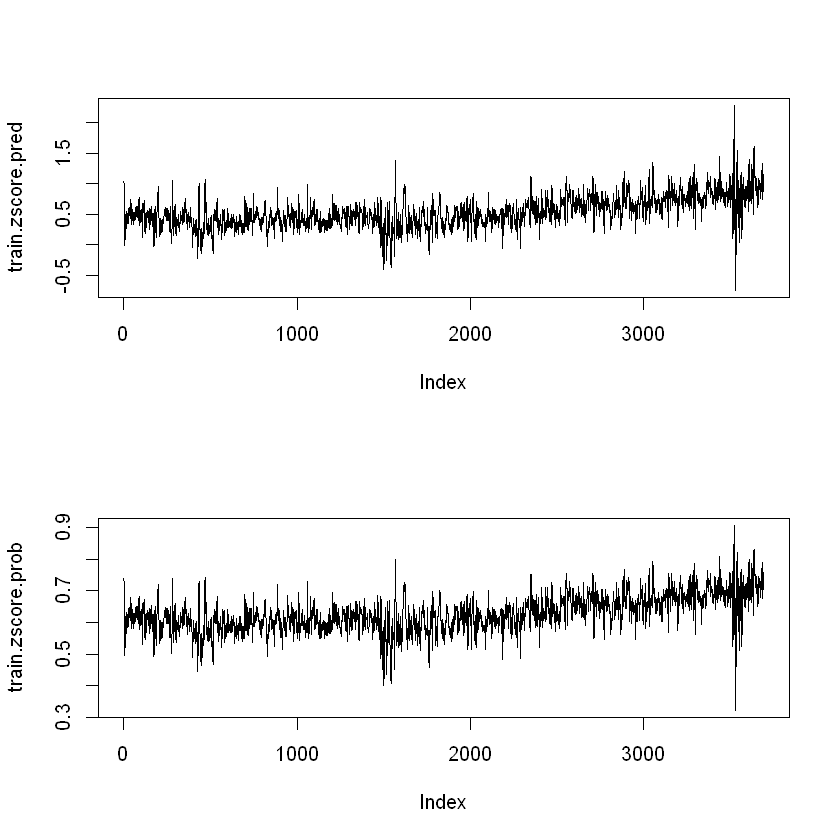

In [102]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(train.zscore.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(train.zscore.prob, type = "l")

In [103]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
train.zscore.pred.direction <- NULL

# Direção para cima (Up)
train.zscore.pred.direction[train.zscore.prob > 0.5] <- 1    

# Direção para baixo (Down)
train.zscore.pred.direction[train.zscore.prob <= 0.5] <- 0

In [104]:
# Matriz de Confusão de treino
confusionMatrix(table(train.zscore.pred.direction,
                      GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                           
train.zscore.pred.direction    0    1
                          0   30   20
                          1 1348 2297
                                         
               Accuracy : 0.6298         
                 95% CI : (0.614, 0.6454)
    No Information Rate : 0.6271         
    P-Value [Acc > NIR] : 0.3738         
                                         
                  Kappa : 0.0163         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.021771       
            Specificity : 0.991368       
         Pos Pred Value : 0.600000       
         Neg Pred Value : 0.630178       
             Prevalence : 0.372936       
         Detection Rate : 0.008119       
   Detection Prevalence : 0.013532       
      Balanced Accuracy : 0.506569       
                                         
       'Positive' Class : 0

In [105]:
# Packages
library(PRROC)

Warning message:
"package 'PRROC' was built under R version 3.6.3"

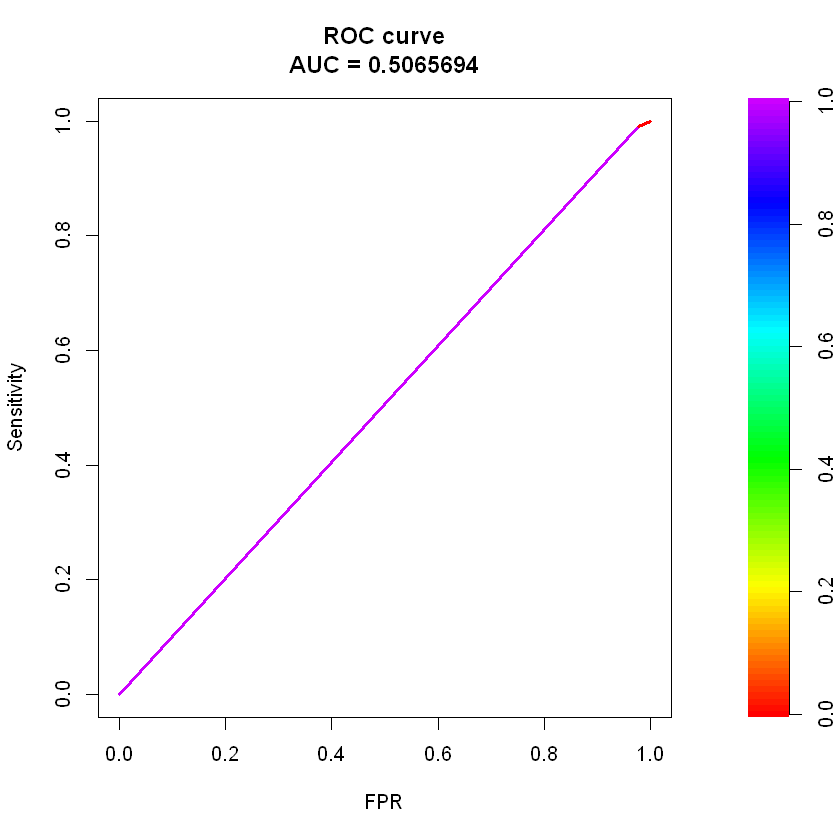

In [106]:
plot(roc.curve(scores.class0 = train.zscore.pred.direction, 
               weights.class0 = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))]$GSPC.Direction, 
               curve=TRUE))

Sinais claros de *overfitting*

**Dados de teste**

In [107]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
test.zscore.pred <- predict(train.zscore.model,
                            GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [108]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
test.zscore.prob <- 1 / (1 + exp(-(test.zscore.pred)))
head(test.zscore.prob) 

60        62        67        68        70        73 
0.7301690 0.6642067 0.6257719 0.6222580 0.5914247 0.6025479

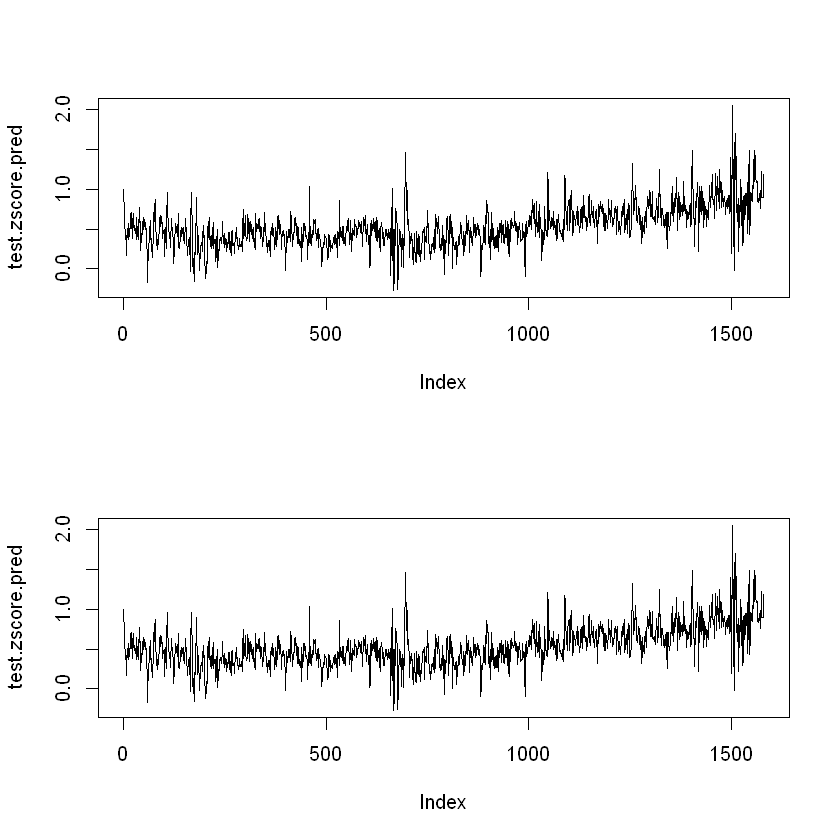

In [109]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(test.zscore.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(test.zscore.pred, type = "l")

In [110]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
test.zscore.pred.direction <- NULL

# Direção para cima (Up)
test.zscore.pred.direction[test.zscore.prob > 0.5] <- 1    

# Direção para baixo (Down)
test.zscore.pred.direction[test.zscore.prob <= 0.5] <- 0

In [111]:
# Matriz de Confusão de treino
confusionMatrix(table(test.zscore.pred.direction,
                      GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                          
test.zscore.pred.direction   0   1
                         0  10  10
                         1 574 987
                                          
               Accuracy : 0.6306          
                 95% CI : (0.6063, 0.6545)
    No Information Rate : 0.6306          
    P-Value [Acc > NIR] : 0.5113          
                                          
                  Kappa : 0.0089          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.017123        
            Specificity : 0.989970        
         Pos Pred Value : 0.500000        
         Neg Pred Value : 0.632287        
             Prevalence : 0.369386        
         Detection Rate : 0.006325        
   Detection Prevalence : 0.012650        
      Balanced Accuracy : 0.503547        
                                          
       'Positive' 

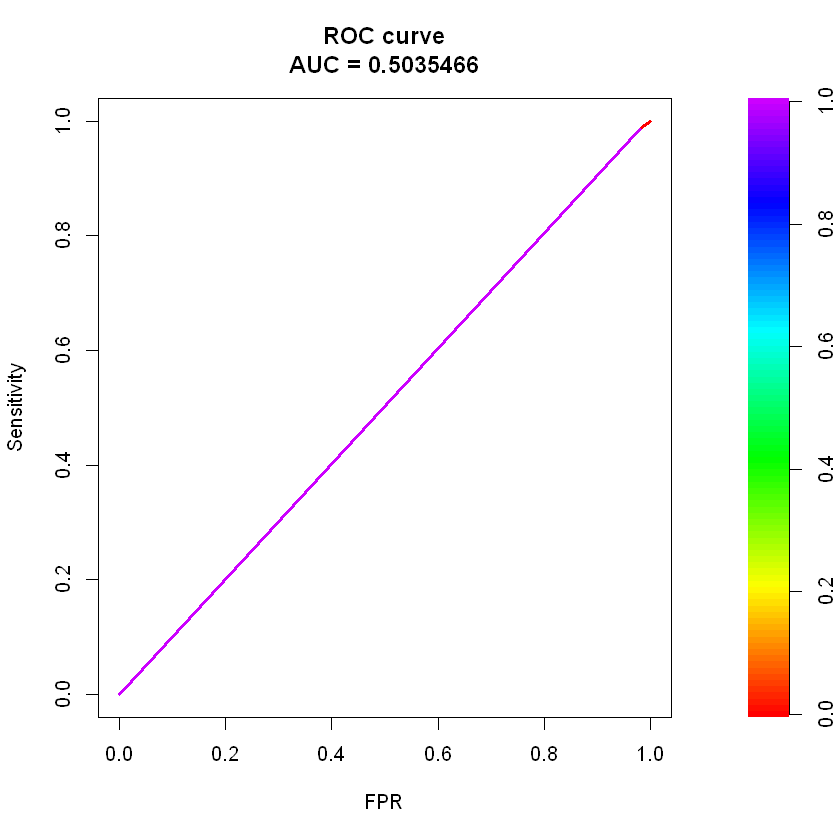

In [112]:
plot(roc.curve(scores.class0 = test.zscore.pred.direction, 
               weights.class0 = GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))]$GSPC.Direction, 
               curve=TRUE))

Apesar de o % de acurácia para os dados de teste ser menor, ainda há sinais de *overfitting*

## 7.1.2 Dados minmax

**Dados de treino**

In [113]:
train.minmax.model <- glm(GSPC.Direction ~.,
                          data = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))],
                          family = binomial)
summary(train.minmax.model)


Call:
glm(formula = formula, family = binomial, data = GSPC.minmax.train[, 
    !(names(GSPC.minmax.train) %in% c("GSPC.Trend"))])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7274  -1.3492   0.8820   0.9896   1.4446  

Coefficients: (2 not defined because of singularities)
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.74146    0.26607   2.787  0.00532 ** 
GSPC.High       14.89123   12.57677   1.184  0.23640    
GSPC.Low        27.95402   10.83436   2.580  0.00988 ** 
GSPC.Close     -29.44872   16.97516  -1.735  0.08277 .  
GSPC.Return      0.24393    0.36994   0.659  0.50966    
GSPC.SMA        40.15453   22.32373   1.799  0.07206 .  
GSPC.WMA       -52.86366   27.48681  -1.923  0.05445 .  
GSPC.MOM         0.07974    0.43184   0.185  0.85350    
GSPC.ROC              NA         NA      NA       NA    
GSPC.StochK      0.41767    0.43997   0.949  0.34246    
GSPC.StochD      0.21603    0.50152   0.431  0.66665    
GSPC.RSI      

In [114]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
train.minmax.pred <- predict(train.minmax.model, GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [115]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
train.minmax.prob <- 1 / (1 + exp(-(train.minmax.pred)))
head(train.minmax.prob) 

59        62        64        65        67        68 
0.7243104 0.6479090 0.6162144 0.4874834 0.6564638 0.6506743

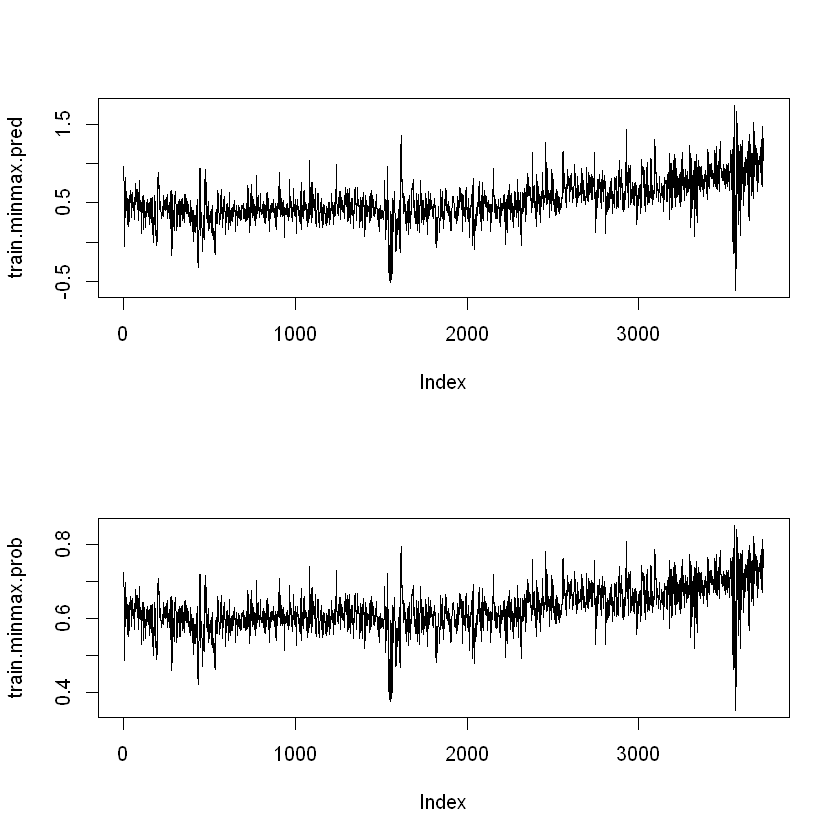

In [116]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(train.minmax.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(train.minmax.prob, type = "l")

In [117]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
train.minmax.pred.direction <- NULL

# Direção para cima (Up)
train.minmax.pred.direction[train.minmax.prob > 0.5] <- 1    

# Direção para baixo (Down)
train.minmax.pred.direction[train.minmax.prob <= 0.5] <- 0

In [118]:
# Matriz de Confusão de treino
confusionMatrix(table(train.minmax.pred.direction,
                      GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                           
train.minmax.pred.direction    0    1
                          0   26   32
                          1 1365 2307
                                         
               Accuracy : 0.6255         
                 95% CI : (0.6097, 0.641)
    No Information Rate : 0.6271         
    P-Value [Acc > NIR] : 0.5876         
                                         
                  Kappa : 0.0062         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.018692       
            Specificity : 0.986319       
         Pos Pred Value : 0.448276       
         Neg Pred Value : 0.628268       
             Prevalence : 0.372922       
         Detection Rate : 0.006971       
   Detection Prevalence : 0.015550       
      Balanced Accuracy : 0.502505       
                                         
       'Positive' Class : 0

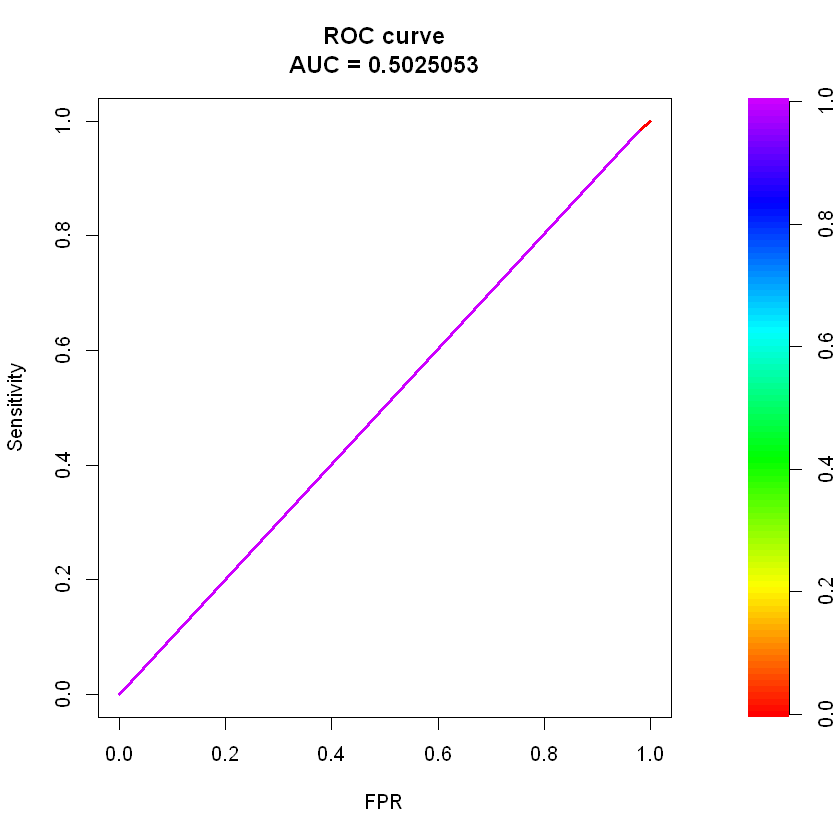

In [119]:
plot(roc.curve(scores.class0 = train.minmax.pred.direction, 
               weights.class0 = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))]$GSPC.Direction, 
               curve=TRUE))

**Dados de teste**

In [120]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
test.minmax.pred <- predict(train.minmax.model, GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [121]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
test.minmax.prob <- 1 / (1 + exp(-(test.minmax.pred)))
head(test.minmax.prob) 

60        61        63        66        73        79 
0.7043952 0.7073609 0.6761268 0.6355290 0.6779131 0.6163064

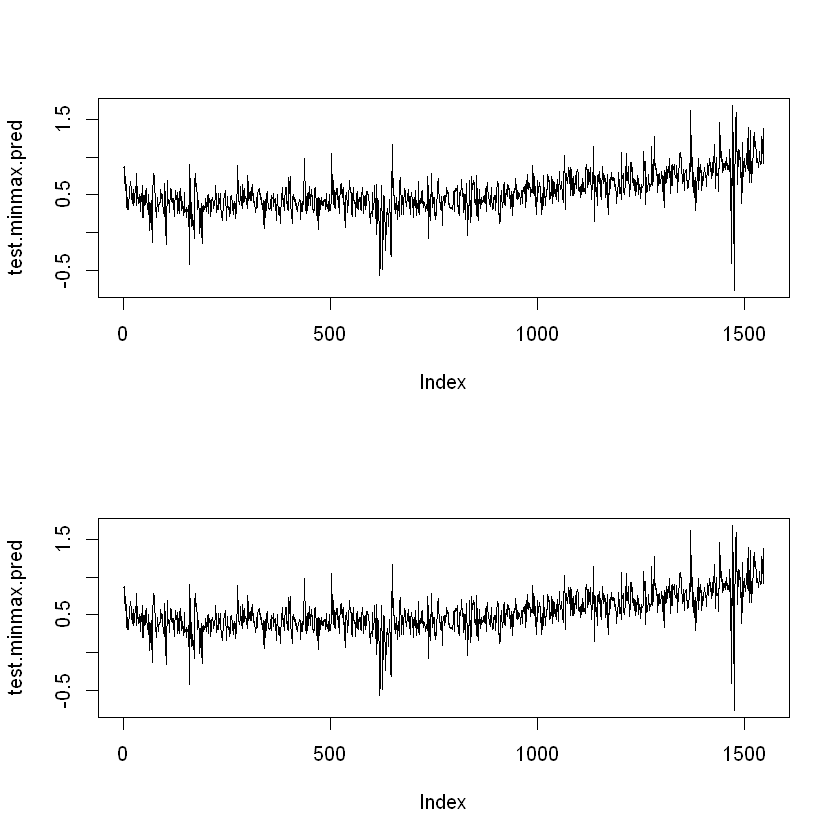

In [122]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(test.minmax.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(test.minmax.pred, type = "l")

In [123]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
test.minmax.pred.direction <- NULL

# Direção para cima (Up)
test.minmax.pred.direction[test.minmax.prob > 0.5] <- 1    

# Direção para baixo (Down)
test.minmax.pred.direction[test.minmax.prob <= 0.5] <- 0

In [124]:
# Matriz de Confusão de treino
confusionMatrix(table(test.minmax.pred.direction,
                      GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                          
test.minmax.pred.direction   0   1
                         0   8  12
                         1 563 963
                                          
               Accuracy : 0.6281          
                 95% CI : (0.6034, 0.6522)
    No Information Rate : 0.6307          
    P-Value [Acc > NIR] : 0.5946          
                                          
                  Kappa : 0.0021          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.014011        
            Specificity : 0.987692        
         Pos Pred Value : 0.400000        
         Neg Pred Value : 0.631062        
             Prevalence : 0.369340        
         Detection Rate : 0.005175        
   Detection Prevalence : 0.012937        
      Balanced Accuracy : 0.500851        
                                          
       'Positive' 

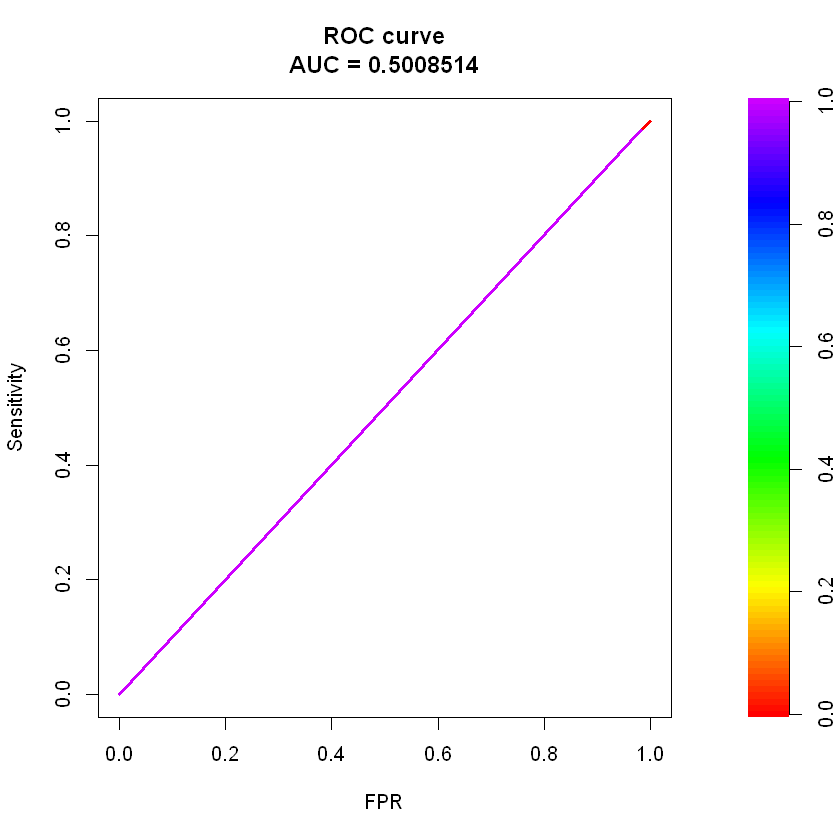

In [125]:
plot(roc.curve(scores.class0 = test.minmax.pred.direction, 
               weights.class0 = GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))]$GSPC.Direction,
               curve=TRUE))

Apesar de o % de acurácia para os dados de teste ser menor, ainda há sinais de *overfitting*

## 7.2. Árvore de Decisão

In [126]:
# Packages
library(rpart) 
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

### 7.2.1. Dados z-score

**Dados de treino**

In [127]:
# Criação da árvore de decisão
train.zscore.model.dt <- rpart(GSPC.Direction ~.,
                               GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))],
                               method = "class")

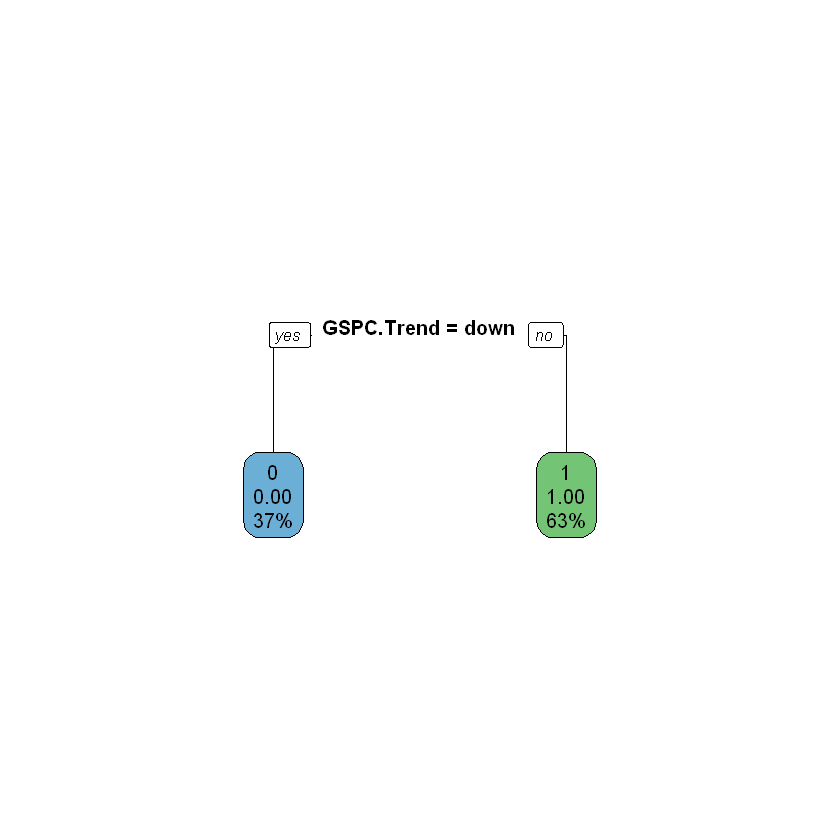

In [128]:
# Criação da árvore gráfica
rpart.plot(train.zscore.model.dt, type = 0, extra = 106, tweak = 1) 

In [129]:
# Importância dos atributos
train.zscore.imp <- varImp(train.zscore.model.dt, scale = F)
train.zscore.imp

,Overall
GSPC.Close,22.3299
GSPC.High,22.3299
GSPC.Low,22.3299
GSPC.Trend,1728.1873
GSPC.WMA,22.3299
GSPC.Return,0.0000
GSPC.SMA,0.0000
GSPC.MOM,0.0000
GSPC.ROC,0.0000
GSPC.StochK,0.0000


In [130]:
# Previsão
train.zscore.dt.pred <- predict(train.zscore.model.dt,
                                GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))],
                                type = "class")

In [131]:
# Matriz de Confusão de treino
confusionMatrix(table(train.zscore.dt.pred,
                      GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))]$GSPC.Direction)) 

Confusion Matrix and Statistics

                    
train.zscore.dt.pred    0    1
                   0 1378    0
                   1    0 2317
                                    
               Accuracy : 1         
                 95% CI : (0.999, 1)
    No Information Rate : 0.6271    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.3729    
         Detection Rate : 0.3729    
   Detection Prevalence : 0.3729    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : 0         
                                    

Pelo % de acurácia, há indícios de *overfitting*.

**Dados de teste**

In [132]:
# Previsão
test.zscore.dt.pred <- predict(train.zscore.model.dt,
                               GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))],
                               type = "class")

In [133]:
# Matriz de Confusão de teste
confusionMatrix(table(test.zscore.dt.pred,
                      GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))]$GSPC.Direction)) 

Confusion Matrix and Statistics

                   
test.zscore.dt.pred   0   1
                  0 584   0
                  1   0 997
                                     
               Accuracy : 1          
                 95% CI : (0.9977, 1)
    No Information Rate : 0.6306     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.3694     
         Detection Rate : 0.3694     
   Detection Prevalence : 0.3694     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

Pelo % de acurácia, há indícios de *overfitting*.

### 7.2.2. Dados minmax

**Dados de treino**

In [134]:
# Criação da árvore de decisão
train.minmax.model.dt <- rpart(GSPC.Direction ~.,
                               GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))],
                               method = "class")

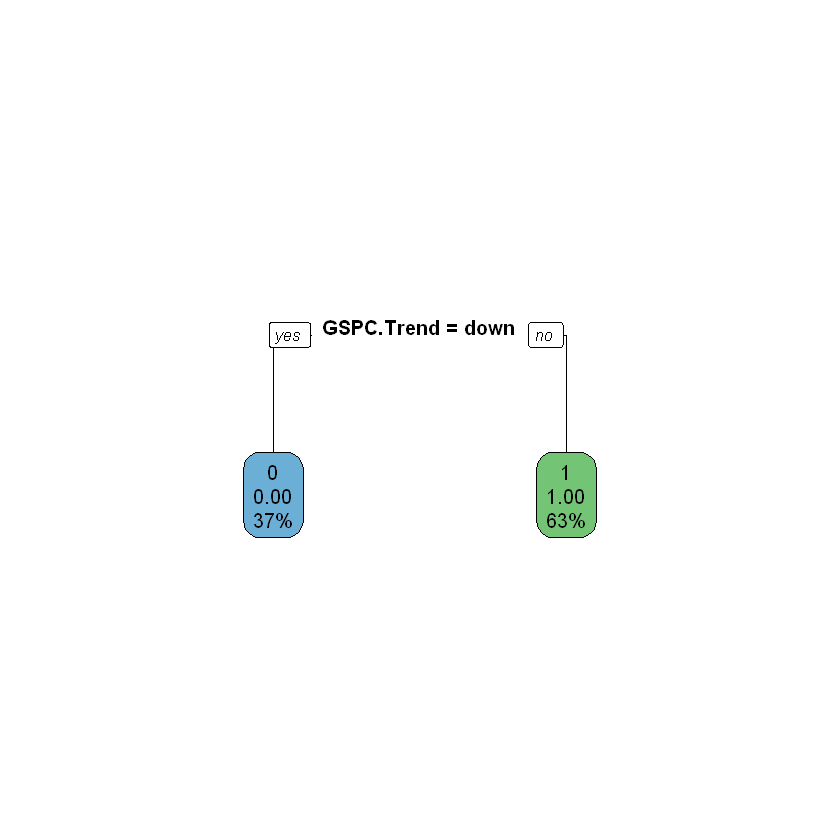

In [135]:
# Criação da árvore gráfica
rpart.plot(train.minmax.model.dt, type = 0, extra = 106, tweak = 1) 

In [136]:
# Importância dos atributos
train.minmax.imp <- varImp(train.minmax.model.dt, scale = F)
train.minmax.imp

,Overall
GSPC.Close,20.05674
GSPC.High,20.05674
GSPC.SMA,21.11228
GSPC.Trend,1744.53029
GSPC.WMA,20.79807
GSPC.Low,0.00000
GSPC.Return,0.00000
GSPC.MOM,0.00000
GSPC.ROC,0.00000
GSPC.StochK,0.00000


In [137]:
# Previsão
train.minmax.dt.pred <- predict(train.minmax.model.dt,
                                GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))],
                                type = "class")

In [138]:
# Matriz de Confusão de treino
confusionMatrix(table(train.minmax.dt.pred,
                      GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))]$GSPC.Direction)) 

Confusion Matrix and Statistics

                    
train.minmax.dt.pred    0    1
                   0 1391    0
                   1    0 2339
                                    
               Accuracy : 1         
                 95% CI : (0.999, 1)
    No Information Rate : 0.6271    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.3729    
         Detection Rate : 0.3729    
   Detection Prevalence : 0.3729    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : 0         
                                    

Pelo % de acurácia, há indícios de *overfitting*.

**Dados de teste**

In [139]:
# Previsão
test.minmax.dt.pred <- predict(train.minmax.model.dt,
                               GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))],
                               type = "class")

In [140]:
# Matriz de Confusão de teste
confusionMatrix(table(test.minmax.dt.pred,
                      GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))]$GSPC.Direction)) 

Confusion Matrix and Statistics

                   
test.minmax.dt.pred   0   1
                  0 571   0
                  1   0 975
                                     
               Accuracy : 1          
                 95% CI : (0.9976, 1)
    No Information Rate : 0.6307     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.3693     
         Detection Rate : 0.3693     
   Detection Prevalence : 0.3693     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

Pelo % de acurácia, há indícios de *overfitting*.

## 7.3. Random Forest

O algoritmo de *random forest* trabalha agregando as predições realizadas pelas diversas *decision trees* de profundidade variável. Cada *decision tree* no algoritmo é treinado em um subconjunto de dataset (*bootstrapped dataset*).

A porção de amostras que foram deixadas durante a construção de cada decision tree no algoritmo é referenciada como *dataset out-of-bag* (OOB). O modelo irá automaticamente avaliar automaticamente seu desempenho rudando cada uma das amostras no dataset OOB através do algoritmo de *random forest*.

O critério de decisão para divisão de uma *decision tree* é por meio da impureza produzida por cada *feature* utilizando o índice de Gini ou entropia. No algoritmo de *random forest*, seleciona-se aleatoriamente um número predefinido de *features* candidatas. O último resultará em uma variância maior entre as árvores que, de certa forma, contenha as mesmas *features* (ou seja, aquelas que são altamente correlacionadas com o rótulo alvo).

Quando o algoritmo de *random forest* é utilizado para classificação e é apresentado com uma nova amostra, a predição final é feita tomando a maioria das predições realizadas por cada *decision treee* no *random forest*.

Obs.: *cross-validation* => utilizado para avaliar a eficiência de um modelo utilizando os dados de treinamento.

In [141]:
# Package
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked _by_ '.GlobalEnv':

    outlier

The following object is masked from 'package:ggplot2':

    margin



### 7.3.1. Dados z-score

**Dados de treino**

In [142]:
# Sintaxe básica
set.seed(123)
zscore.model.rf <- randomForest(as.factor(GSPC.Trend) ~ ., 
                                data = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction'))],
                                method = 'rf',
                                trControl = trainControl(method = 'cv', number = 5))
zscore.model.rf

# data = GSPC.zscore.train.rf => dados de treino
# method = 'rf' => utilização do algoritmo de random forest
# method = 'cv' => validação cruzada
# number = 5 => 5 folds for cross-validation


Call:
 randomForest(formula = as.factor(GSPC.Trend) ~ ., data = GSPC.zscore.train[,      !(names(GSPC.zscore.train) %in% c("GSPC.Direction"))], method = "rf",      trControl = trainControl(method = "cv", number = 5)) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 17.81%
Confusion matrix:
     down   up class.error
down  931  447  0.32438316
up    211 2106  0.09106603

Por default, o número de *decision trees* no *random forest* é 500 e o número de *features* utilizadas como candidatas potenciais para cada divisão é 3. O modelo automaticamente tentará classificar cada uma das amostras no dataset OOB e mostrará uma matriz de confusão com os resultados.

O número de variáveis experimentadas em cada split é baseada na seginte fórmula:

In [143]:
# Previsão
train.zscore.rf.pred <- predict(zscore.model.rf, 
                                GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))])

In [144]:
# Matriz de Confusão de teste
confusionMatrix(table(GSPC.zscore.train$GSPC.Trend, train.zscore.rf.pred))

Confusion Matrix and Statistics

      train.zscore.rf.pred
       down   up
  down 1378    0
  up      0 2317
                                    
               Accuracy : 1         
                 95% CI : (0.999, 1)
    No Information Rate : 0.6271    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.3729    
         Detection Rate : 0.3729    
   Detection Prevalence : 0.3729    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : down      
                                    

Uma vez que este é um problema de classificação, utiliza-se uma matriz de confusão para avaliar o desempenho do modelo.

**Dados de teste**

In [145]:
# Previsão
test.zscore.rf.pred <- predict(zscore.model.rf,
                               GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Direction'))])

In [146]:
# Matriz de Confusão de teste
confusionMatrix(table(GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Direction'))]$GSPC.Trend,
                      test.zscore.rf.pred))

Confusion Matrix and Statistics

      test.zscore.rf.pred
       down  up
  down  412 172
  up    103 894
                                          
               Accuracy : 0.8261          
                 95% CI : (0.8065, 0.8444)
    No Information Rate : 0.6743          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6173          
                                          
 Mcnemar's Test P-Value : 4.122e-05       
                                          
            Sensitivity : 0.8000          
            Specificity : 0.8386          
         Pos Pred Value : 0.7055          
         Neg Pred Value : 0.8967          
             Prevalence : 0.3257          
         Detection Rate : 0.2606          
   Detection Prevalence : 0.3694          
      Balanced Accuracy : 0.8193          
                                          
       'Positive' Class : down            
                                 

### 7.3.2. Dados minmax

**Dados de treino**

In [147]:
# Sintaxe básica
set.seed(123)
minmax.model.rf <- randomForest(as.factor(GSPC.Trend) ~ ., 
                                data = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction'))], 
                                method = 'rf',
                                trControl = trainControl(method = 'cv', number = 5))
minmax.model.rf

# data = GSPC.zscore.train.rf => dados de treino
# method = 'rf' => utilização do algoritmo de random forest
# method = 'cv' => validação cruzada
# number = 5 => 5 folds for cross-validation


Call:
 randomForest(formula = as.factor(GSPC.Trend) ~ ., data = GSPC.minmax.train[,      !(names(GSPC.minmax.train) %in% c("GSPC.Direction"))], method = "rf",      trControl = trainControl(method = "cv", number = 5)) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 18.66%
Confusion matrix:
     down   up class.error
down  929  462   0.3321352
up    234 2105   0.1000428

In [148]:
# Previsão
train.minmax.rf.pred <- predict(minmax.model.rf, 
                                GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))])

In [149]:
# Matriz de Confusão de teste
confusionMatrix(table(GSPC.minmax.train$GSPC.Trend, train.minmax.rf.pred))

Confusion Matrix and Statistics

      train.minmax.rf.pred
       down   up
  down 1391    0
  up      0 2339
                                    
               Accuracy : 1         
                 95% CI : (0.999, 1)
    No Information Rate : 0.6271    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.3729    
         Detection Rate : 0.3729    
   Detection Prevalence : 0.3729    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : down      
                                    

**Dados de teste**

In [150]:
# Previsão
test.minmax.rf.pred <- predict(minmax.model.rf,
                               GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction'))])

In [151]:
# Matriz de Confusão de teste
confusionMatrix(table(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction'))]$GSPC.Trend,
                      test.minmax.rf.pred))

Confusion Matrix and Statistics

      test.minmax.rf.pred
       down  up
  down  349 222
  up    100 875
                                          
               Accuracy : 0.7917          
                 95% CI : (0.7706, 0.8117)
    No Information Rate : 0.7096          
    P-Value [Acc > NIR] : 1.262e-13       
                                          
                  Kappa : 0.5322          
                                          
 Mcnemar's Test P-Value : 1.551e-11       
                                          
            Sensitivity : 0.7773          
            Specificity : 0.7976          
         Pos Pred Value : 0.6112          
         Neg Pred Value : 0.8974          
             Prevalence : 0.2904          
         Detection Rate : 0.2257          
   Detection Prevalence : 0.3693          
      Balanced Accuracy : 0.7875          
                                          
       'Positive' Class : down            
                                 

## 7.4. K Nearest Neighborhood

In [152]:
# Package
library(class)

In [153]:
# Definição do número de Neighborhoods    
neighborhood <- 3

# O número de neighborhoods corresponde ao número de direções (Up, Down, NoWhere)

### 7.4.1. Dados z-score

**Dados de treino**

In [154]:
# modelo avaliado por treino
set.seed(123)
train.zscore.knn.model <- knn(GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.zscore.train$GSPC.Trend), neighborhood)   
head(train.zscore.knn.model)

[1] down down down down up   down
Levels: down up

In [155]:
# Matriz de Confusão de treino
confusionMatrix(table(train.zscore.knn.model,
                      as.factor(GSPC.zscore.train$GSPC.Trend))) 

Confusion Matrix and Statistics

                      
train.zscore.knn.model down   up
                  down  997  276
                  up    381 2041
                                          
               Accuracy : 0.8222          
                 95% CI : (0.8095, 0.8344)
    No Information Rate : 0.6271          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6139          
                                          
 Mcnemar's Test P-Value : 4.962e-05       
                                          
            Sensitivity : 0.7235          
            Specificity : 0.8809          
         Pos Pred Value : 0.7832          
         Neg Pred Value : 0.8427          
             Prevalence : 0.3729          
         Detection Rate : 0.2698          
   Detection Prevalence : 0.3445          
      Balanced Accuracy : 0.8022          
                                          
       'Positive' Class : do

**Dados de teste**

In [156]:
set.seed(123)
test.zscore.knn.model <- knn(GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.zscore.test[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.zscore.train$GSPC.Trend), neighborhood)   
head(test.zscore.knn.model)

[1] down down up   down up   up  
Levels: down up

In [157]:
# Matriz de Confusão de teste
confusionMatrix(table(test.zscore.knn.model, as.factor(GSPC.zscore.test$GSPC.Trend))) 

Confusion Matrix and Statistics

                     
test.zscore.knn.model down  up
                 down  257 291
                 up    327 706
                                          
               Accuracy : 0.6091          
                 95% CI : (0.5846, 0.6333)
    No Information Rate : 0.6306          
    P-Value [Acc > NIR] : 0.9635          
                                          
                  Kappa : 0.1501          
                                          
 Mcnemar's Test P-Value : 0.1592          
                                          
            Sensitivity : 0.4401          
            Specificity : 0.7081          
         Pos Pred Value : 0.4690          
         Neg Pred Value : 0.6834          
             Prevalence : 0.3694          
         Detection Rate : 0.1626          
   Detection Prevalence : 0.3466          
      Balanced Accuracy : 0.5741          
                                          
       'Positive' Class : down     

### 7.4.2. Dados minmax

**Dados de treino**

In [158]:
# modelo avaliado por treino
set.seed(123)
train.minmax.knn.model <- knn(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.minmax.train$GSPC.Trend), neighborhood)   
head(train.minmax.knn.model)

[1] down down up   down down down
Levels: down up

In [159]:
# Matriz de Confusão de treino
confusionMatrix(table(train.minmax.knn.model, as.factor(GSPC.minmax.train$GSPC.Trend))) 

Confusion Matrix and Statistics

                      
train.minmax.knn.model down   up
                  down  997  274
                  up    394 2065
                                          
               Accuracy : 0.8209          
                 95% CI : (0.8082, 0.8331)
    No Information Rate : 0.6271          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6103          
                                          
 Mcnemar's Test P-Value : 4.14e-06        
                                          
            Sensitivity : 0.7168          
            Specificity : 0.8829          
         Pos Pred Value : 0.7844          
         Neg Pred Value : 0.8398          
             Prevalence : 0.3729          
         Detection Rate : 0.2673          
   Detection Prevalence : 0.3408          
      Balanced Accuracy : 0.7998          
                                          
       'Positive' Class : do

**Dados de teste**

In [160]:
set.seed(123)
test.minmax.knn.model <- knn(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.minmax.test[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.minmax.train$GSPC.Trend), neighborhood)   
head(test.minmax.knn.model)

[1] down down down down up   up  
Levels: down up

In [161]:
# Matriz de Confusão de teste
confusionMatrix(table(test.minmax.knn.model, as.factor(GSPC.minmax.test$GSPC.Trend))) 

Confusion Matrix and Statistics

                     
test.minmax.knn.model down  up
                 down  230 265
                 up    341 710
                                          
               Accuracy : 0.608           
                 95% CI : (0.5832, 0.6325)
    No Information Rate : 0.6307          
    P-Value [Acc > NIR] : 0.968932        
                                          
                  Kappa : 0.1347          
                                          
 Mcnemar's Test P-Value : 0.002314        
                                          
            Sensitivity : 0.4028          
            Specificity : 0.7282          
         Pos Pred Value : 0.4646          
         Neg Pred Value : 0.6755          
             Prevalence : 0.3693          
         Detection Rate : 0.1488          
   Detection Prevalence : 0.3202          
      Balanced Accuracy : 0.5655          
                                          
       'Positive' Class : down     

## 7.5. Support Vector Machine

### 7.5.1. Dados z-score

**Dados de treino**

In [162]:
train.zscore.svm.model <- svm(GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))],
                              as.factor(GSPC.zscore.train$GSPC.Trend))    
head(train.zscore.svm.model)

$call
svm.default(x = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% 
    c("GSPC.Direction", "GSPC.Trend"))], y = as.factor(GSPC.zscore.train$GSPC.Trend))

$type
[1] 0

$kernel
[1] 2

$cost
[1] 1

$degree
[1] 3

$gamma
[1] 0.05555556


In [163]:
# Predição
train.zscore.svm.pred <- predict(train.zscore.svm.model,
                                 GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(train.zscore.svm.pred, as.factor(GSPC.zscore.train$GSPC.Trend)))

Confusion Matrix and Statistics

                     
train.zscore.svm.pred down   up
                 down    7    1
                 up   1371 2316
                                          
               Accuracy : 0.6287          
                 95% CI : (0.6129, 0.6443)
    No Information Rate : 0.6271          
    P-Value [Acc > NIR] : 0.4263          
                                          
                  Kappa : 0.0058          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.005080        
            Specificity : 0.999568        
         Pos Pred Value : 0.875000        
         Neg Pred Value : 0.628153        
             Prevalence : 0.372936        
         Detection Rate : 0.001894        
   Detection Prevalence : 0.002165        
      Balanced Accuracy : 0.502324        
                                          
       'Positive' Class : down  

**Dados de teste**

In [164]:
# Predição
test.zscore.svm.pred <- predict(train.zscore.svm.model,
                                GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(test.zscore.svm.pred, as.factor(GSPC.zscore.test$GSPC.Trend)))

Confusion Matrix and Statistics

                    
test.zscore.svm.pred down  up
                down    0   1
                up    584 996
                                          
               Accuracy : 0.63            
                 95% CI : (0.6056, 0.6538)
    No Information Rate : 0.6306          
    P-Value [Acc > NIR] : 0.532           
                                          
                  Kappa : -0.0013         
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.0000000       
            Specificity : 0.9989970       
         Pos Pred Value : 0.0000000       
         Neg Pred Value : 0.6303797       
             Prevalence : 0.3693865       
         Detection Rate : 0.0000000       
   Detection Prevalence : 0.0006325       
      Balanced Accuracy : 0.4994985       
                                          
       'Positive' Class : down         

### 7.5.2. Dados minmax

**Dados de treino**

In [165]:
train.minmax.svm.model <- svm(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))],
                              as.factor(GSPC.minmax.train$GSPC.Trend))    
head(train.minmax.svm.model)

$call
svm.default(x = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% 
    c("GSPC.Direction", "GSPC.Trend"))], y = as.factor(GSPC.minmax.train$GSPC.Trend))

$type
[1] 0

$kernel
[1] 2

$cost
[1] 1

$degree
[1] 3

$gamma
[1] 0.05882353


In [166]:
# Predição
train.minmax.svm.pred <- predict(train.minmax.svm.model,
                                 GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(train.minmax.svm.pred, as.factor(GSPC.minmax.train$GSPC.Trend)))

Confusion Matrix and Statistics

                     
train.minmax.svm.pred down   up
                 down    5    1
                 up   1386 2338
                                          
               Accuracy : 0.6282          
                 95% CI : (0.6124, 0.6437)
    No Information Rate : 0.6271          
    P-Value [Acc > NIR] : 0.4534          
                                          
                  Kappa : 0.004           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.003595        
            Specificity : 0.999572        
         Pos Pred Value : 0.833333        
         Neg Pred Value : 0.627820        
             Prevalence : 0.372922        
         Detection Rate : 0.001340        
   Detection Prevalence : 0.001609        
      Balanced Accuracy : 0.501584        
                                          
       'Positive' Class : down  

**Dados de teste**

In [167]:
# Predição
test.minmax.svm.pred <- predict(train.minmax.svm.model,
                                GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(test.minmax.svm.pred, as.factor(GSPC.minmax.test$GSPC.Trend)))

Confusion Matrix and Statistics

                    
test.minmax.svm.pred down  up
                down    1   1
                up    570 974
                                         
               Accuracy : 0.6307         
                 95% CI : (0.606, 0.6548)
    No Information Rate : 0.6307         
    P-Value [Acc > NIR] : 0.5114         
                                         
                  Kappa : 9e-04          
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.0017513      
            Specificity : 0.9989744      
         Pos Pred Value : 0.5000000      
         Neg Pred Value : 0.6308290      
             Prevalence : 0.3693402      
         Detection Rate : 0.0006468      
   Detection Prevalence : 0.0012937      
      Balanced Accuracy : 0.5003628      
                                         
       'Positive' Class : down           
                